# RELAZIONE D'ESAME TRMD - Rebecca De Moliner

## OBIETTIVO del LAVORO

Studiare la **formazione e distribuzione degli ammassi di galassie** è importante in cosmologia per comprendere **proprietà fondamentali del nostro universo**.<br>
Il lavoro che segue si pone l'obiettivo di **analizzare un catalogo di ammassi di galassie**, focalizzandosi sulla distribuzione delle masse. Nel catalogo di riferimento sono riportati rispettivamente: la massa di ogni ammasso (in masse solari), il bin di redshift di apparteneza e il volume di universo associato a ciascun bin (in $h^{-3}Mpc^3$).<br>
Andremo poi a **confrontare i risultati ottenuti con le previsioni teoriche** della Halo Mass Function (HMF).
Attraverso questa analisi sarà possibile applicare metodi statistici per **stimare parametri cosmologici** come la densità di materia totale, $\Omega_m$, e l'ampiezza delle fluttuazioni di densità su scale di $8h^{-1}Mpc$, $\sigma_8$, per un modello di universo piatto. Sarà possibile estendere l'analisi a **modelli cosmologici** in cui la **geometria** dell'universo **non** è **piatta**, introducendo come  ulteriore parametro la densità di energia oscura $\Omega_\Lambda$.

## INDICE

1. **Visualizzazione e Analisi dei Dati**<br>
    1.1 Introduzione teorica<br>
    1.2 Visualizzazione dati<br>
    1.3 Analisi dati<br>
2. **Analisi della Halo Mass Function (HMF)** <br>
    2.1 Introduzione teorica<br>
    2.2 Analisi HMF con la libreria Colossus<br>
3. **Inferenza Bayesiana considerando un universo piatto** <br>
    3.1 Richiami di statistica Bayesiana<br>
    3.2 Introduzione teorica<br>
    3.3 Distribuzine statistica dei parametri $\sigma_8$ e $\Omega_m$ <br>
    3.4 Analisi delle catene e della posterior <br>
    3.5 Possibili sviluppi <br>
4. **Inferenza Bayesiana considerando la curvatura dell'universo**<br>
   4.1 Introduzione teorica<br>
   4.2 Distribuzione statistica dei parametri considerando anche $\Omega_\Lambda$<br>
   4.3 Analisi delle catene e della posterior<br>
   4.4 Vincoli su $\Omega_k$<br>

## 1. VISUALIZZAZIONE E ANALISI DATI

### 1.1 INTRODUZIONE TEORICA

Si riporta di seguito una breve descrizione del significato fisico dei dati contenuti nel catalogo di riferimento:
* **Ammassi di galassie**<br>
Gli ammassi di galassie sono le strutture più grandi dell'Universo legate gravitazionalmente, contenenti centinaia o addirittura migliaia di galassie. Nel catalogo presentato vengono raccolti ammassi di galsssie in 3 bin di redshift e viene riportata la massa totale di ogni ammasso. 
* **Redshift cosmologico**<br>
Il redshift cosmologico, *z*, è una misura dello spostamento verso lunghezze d’onda più lunghe (verso il rosso) della luce proveniente da oggetti distanti, come le galassie.  
Il redshift è definito come:  
$$z = \frac{\lambda_{\text{osservata}} - \lambda_{\text{emessa}}}{\lambda_{\text{emessa}}}$$
Più grande è il redshift e più lontano e antico è l'oggetto osservato.<br>
* **Volume di universo associato a ciascun bin**<br>
Ogni bin di redshift definisce un porzione di universo attorno a noi compresa tra due valori di redshift, questo è il volume di universo associato a ciascun bin.

### 1.2 VISUALIZZAZIONE DATI

Come prima cosa andiamo a scaricare il **catagolo degli ammassi di galassie** e visualizziamo i dati. <br>
Andiamo ad eliminare infomazioni che non sono utili per la nostra analisi del dataset.

In [1]:
#Importiamo le librerie che ci possono essere utili
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#I file csv sono file di dati con valori separati da virgole
#Il comando read_csv legge il file e lo organizza in una tabella
data = pd.read_csv( "Euclid_ammassi.csv" )
#Visualizzando il file si nota che la prima colonna non contiene informazioni utili (è l'indice associato ad ogni riga), la posso eliminare
data = data.drop( 'Unnamed: 0', axis = 1 )
data

,mass,z,vol
0,1.060613e+14,0.506,1.479387e+10
1,1.097076e+14,0.506,1.479387e+10
2,1.588869e+14,0.506,1.479387e+10
3,1.336345e+14,0.506,1.479387e+10
4,3.078288e+14,0.506,1.479387e+10
...,...,...,...
362632,1.002043e+14,1.500,9.112247e+10
362633,1.267961e+14,1.500,9.112247e+10
362634,1.273208e+14,1.500,9.112247e+10
362635,1.093178e+14,1.500,9.112247e+10


Sappiamo che questi ammassi di galassie sono raggruppati in **3 bin di redshift**, a ciascuno dei quali è associato un volume di universo.<br>
Abbiamo visto a lezione che è possibile raggruppare i dati in un dataframe in base ad una "chiave". In questo caso possiamo farlo considerando la colonna 'z', quella relativa al redshift.

In [3]:
data.groupby('z').head(3)

,mass,z,vol
0,1.060613e+14,0.506,1.479387e+10
1,1.097076e+14,0.506,1.479387e+10
2,1.588869e+14,0.506,1.479387e+10
168897,1.122773e+14,1.019,4.783826e+10
168898,1.382684e+14,1.019,4.783826e+10
168899,2.561905e+14,1.019,4.783826e+10
310904,1.270383e+14,1.500,9.112247e+10
310905,1.117731e+14,1.500,9.112247e+10
310906,2.968534e+14,1.500,9.112247e+10


Notiamo subito che all'aumentare del redshift aumenta anche il volume di universo associato. Questo è in accordo con ciò che mi aspetto dal momento che all'aumentare del redshift aumenta la distanza alla quale osservo l'ammasso.

### 1.3 ANALISI DATI

Contiamo il numero di ammassi totali.

In [4]:
#Numero totale di righe della tabella
len(data)

362637

Dal momento che abbiamo vissualizzato i 3 bin di redshift possiamo ottenere una **descrizione statistica** dei valori delle masse degli ammassi per ogni raggruppamento.

In [5]:
data.groupby('z')['mass'].describe()

,count,mean,std,min,25%,50%,75%,max
z,,,,,,,,
0.506,168897.0,1.754502e+14,1.022009e+14,1.000004e+14,1.162374e+14,1.417421e+14,1.942476e+14,2.231156e+15
1.019,142007.0,1.520161e+14,6.478489e+13,1.000036e+14,1.120814e+14,1.307558e+14,1.668826e+14,1.536768e+15
1.500,51733.0,1.370772e+14,4.304113e+13,1.000017e+14,1.093389e+14,1.230673e+14,1.487753e+14,9.605430e+14


In questa tabella 'count' indica quanti ammassi sono stati osservati in ciascun intervallo di redshift. Notiamo subito che all'aumentare di z diminuisce il numero di ammassi di galassie osservati. Questo è in accordo con ciò che ci aspettiamo, infatti un basso redshift corrisponde ad un universo più recente, gli ammassi hanno avuto quindi più tempo per formarsi. Un alto redshift invece corrisponde ad un universo giovane, gli ammassi in questa fase erano ancora in formazione.<br>

A questo punto è utile suddividere i dati nei 3 intervalli di redshift per poter poi graficare la distribuzione delle masse degli ammassi separatamente per ogni redshift.

In [6]:
#Valori di redshift, già estratti precedentemente
z1= 0.506
z2=1.019
z3=1.500
#Valori di volume di universo associati
vol1=data['vol'].iloc[0]
vol2=data['vol'].iloc[168898]
vol3=data['vol'].iloc[310904]
print(f"Redshift {z1} corrisponde a volume {vol1}")
print(f"Redshift {z2} corrisponde a volume {vol2}")
print(f"Redshift {z3} corrisponde a volume {vol3}")

Redshift 0.506 corrisponde a volume 14793872865.61798
Redshift 1.019 corrisponde a volume 47838257244.60784
Redshift 1.5 corrisponde a volume 91122466267.5196


In [7]:
# Divisione del dataset secondo i 3 valori di redshift
data1 = data[data['z'] == z1]   # prende le righe con z1
data2 = data[data['z'] == z2]   # prende le righe con z2
data3 = data[data['z'] == z3]   # prende le righe con z3

# Contiamo il numero di ammassi in ciascun redshift (dovrei ottenere i valori di 'count')
print(len(data1), len(data2), len(data3))
print(np.sqrt(len(data1)),np.sqrt(len(data2)),np.sqrt(len(data3)))

168897 142007 51733
410.97080188256683 376.8381615494906 227.44889535893552


La consegna suggerisce di fare dei **plot delle distribuzioni delle masse in scala logaritmica** per evidenziare meglio la distribuzione, dato che le masse coprono ordini di grandezza molto ampi. 

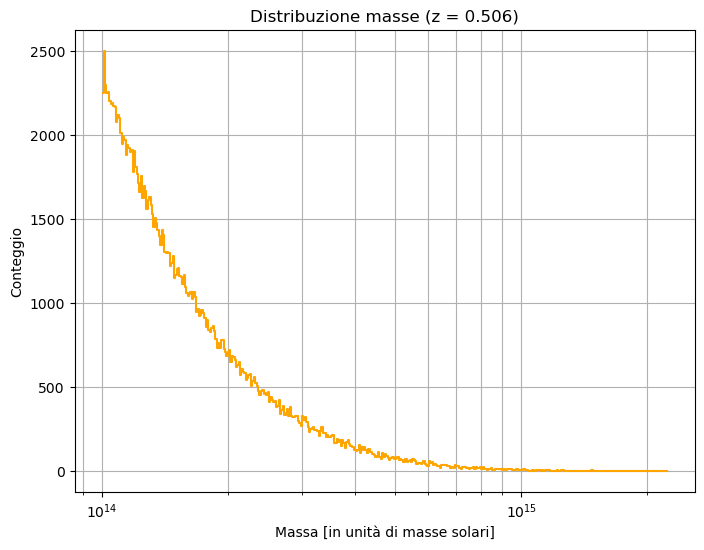

In [8]:
# Numero di bin
nbins_1 = int(np.sqrt(len(data1)))

# Calcolo log(min) e log(max) delle masse
log_mass1_min = np.log(data1['mass'].min()) #log della massa più piccola di data1
log_mass1_max = np.log(data1['mass'].max()) #log della massa più grande di data1

# Costruisco bin equispaziati in scala logaritmica
log_bins1 = np.linspace(log_mass1_min, log_mass1_max, nbins_1+1) #sequenza di valori equispaziati
                                                                 #un istogramma con n bins ha n+1 estremi 
mass_bins1 = np.exp(log_bins1)   # riporto i bin in scala lineare

# Istogramma usando bin logaritmici
conteggi_bins1, bordi_bins1 = np.histogram(data1['mass'], mass_bins1)

# Centri dei bin
centri_bins1 = 0.5 * (bordi_bins1[:-1] + bordi_bins1[1:])

# Plot
plt.figure(figsize=(8,6))
plt.step(centri_bins1, conteggi_bins1, where="mid", color="orange")
plt.xscale("log")   # asse X logaritmico
plt.xlabel("Massa [in unità di masse solari]")
plt.ylabel("Conteggio")
plt.title(f"Distribuzione masse (z = {z1})")
plt.grid(True, which="both", ls="-")

plt.show()

In questo codice si è scelto di creare **bin equispaziati in scala logaritmica** dal momento che, creando in precedenza un istogramma con i bin equispaziati in scala lineare, si perde informazione riguardo le masse più alte: ho molti conteggi per masse inferiori e pochi conteggi nelle masse più alte.

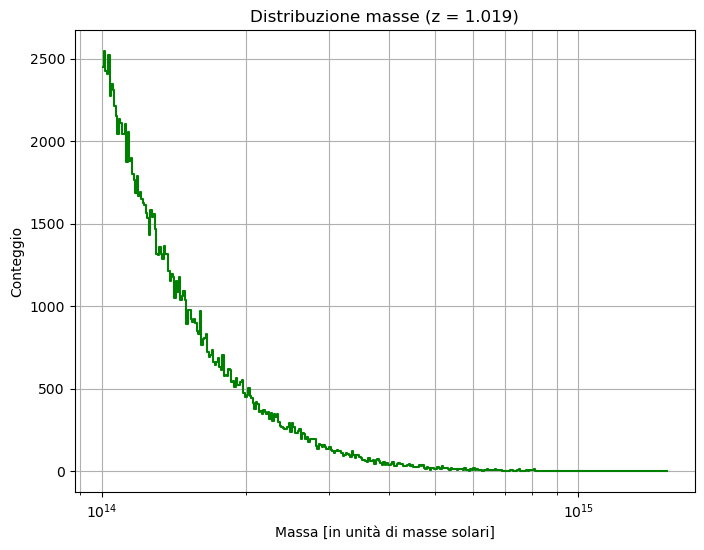

In [9]:
# Numero di bin
nbins_2 = int(np.sqrt(len(data2)))

# Calcolo log(min) e log(max) delle masse
log_mass2_min = np.log(data2['mass'].min()) #log della massa più piccola di data2
log_mass2_max = np.log(data2['mass'].max()) #log della massa più grande di data2

# Costruisco bin equispaziati in scala logaritmica
log_bins2 = np.linspace(log_mass2_min, log_mass2_max, nbins_2+1) #sequenza di valori equispaziati
                                                                 #un istogramma con n bins ha n+1 estremi 
mass_bins2 = np.exp(log_bins2)   # riporto i bin in scala lineare

# Istogramma usando bin logaritmici
conteggi_bins2, bordi_bins2 = np.histogram(data2['mass'], mass_bins2)

# Centri dei bin
centri_bins2 = 0.5 * (bordi_bins2[:-1] + bordi_bins2[1:])

# Plot
plt.figure(figsize=(8,6))
plt.step(centri_bins2, conteggi_bins2, where="mid", color="green")

plt.xscale("log")   # asse X logaritmico
plt.xlabel("Massa [in unità di masse solari]")
plt.ylabel("Conteggio")
plt.title(f"Distribuzione masse (z = {z2})")
plt.grid(True, which="both", ls="-")

plt.show()

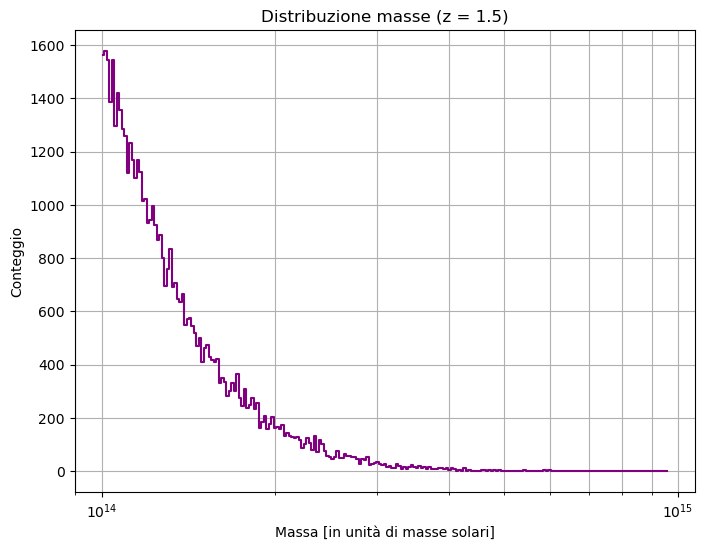

In [10]:
# Numero di bin
nbins_3 = int(np.sqrt(len(data3)))

# Calcolo log(min) e log(max) delle masse
log_mass3_min = np.log(data3['mass'].min()) #log della massa più piccola di data3
log_mass3_max = np.log(data3['mass'].max()) #log della massa più grande di data3

# Costruisco bin equispaziati in scala logaritmica
log_bins3 = np.linspace(log_mass3_min, log_mass3_max, nbins_3+1) #sequenza di valori equispaziati
                                                                 #un istogramma con n bins ha n+1 estremi 
mass_bins3 = np.exp(log_bins3)   # riporto i bin in scala lineare

# Istogramma usando bin logaritmici
conteggi_bins3, bordi_bins3 = np.histogram(data3['mass'], mass_bins3)

# Centri dei bin
centri_bins3 = 0.5 * (bordi_bins3[:-1] + bordi_bins3[1:])

# Plot
plt.figure(figsize=(8,6))
plt.step(centri_bins3, conteggi_bins3, where="mid", color="purple")

plt.xscale("log")   # asse X logaritmico
plt.xlabel("Massa [in unità di masse solari]")
plt.ylabel("Conteggio")
plt.title(f"Distribuzione masse (z = {z3})")
plt.grid(True, which="both", ls="-")

plt.show()

Questi tre grafici non presentano la stessa suddivisione nell'asse delle masse degli ammassi, risulta quindi difficile andare a fare un confronto diretto tra le 3 distribuzioni. <br>
Si ritiene più conveniente utilizzare un unico numero di bins per i 3 istogrammi (che si è scelto approssimando il valore medio dei tre valori utilizzati in precedenza) e creare bin equispaziati in scala logaritmica considerando tutti i valori delle masse. <br>
Si grafica di seguito il confronto tra le 3 distribuzioni di masse, prima considerando i conteggi e poi normalizzando i dati.

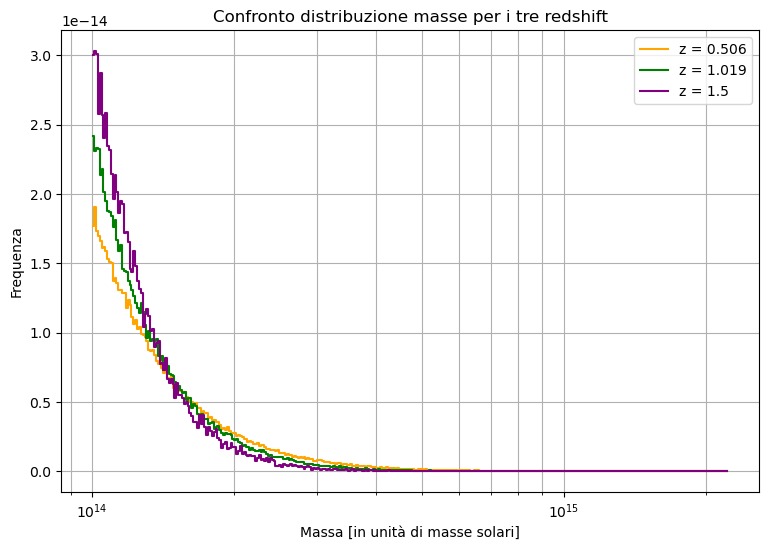

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Numero di bin scelto (comune ai 3 grafici)
Nbins = 340

# Calcolo min e max delle masse considerando tutti i dataset
log_min = np.log(data['mass'].min())
log_max = np.log(data['mass'].max())

# Costruisco bin equispaziati in log(massa)
log_bins = np.linspace(log_min, log_max, Nbins+1)
mass_bins = np.exp(log_bins)   # riporto i bin in scala lineare

# Creo una lista di tuple che raccoglie le informazioni per plottare i 3 istogrammi
datasets = [
    (data1['mass'], z1, "orange"),
    (data2['mass'], z2, "green"),
    (data3['mass'], z3, "purple")
]

plt.figure(figsize=(9,6))

# Ciclo sui tre dataset
for massa, z, colore in datasets:
    #conteggi, bordi_bins = np.histogram(massa, bins=mass_bins)
    frequenze, bordi_bins = np.histogram(massa, bins=mass_bins, density=True)
    centri = 0.5 * (bordi_bins[:-1] + bordi_bins[1:])
    #plt.step(centri, conteggi, where="mid", label=f"z = {z}", color=colore)
    plt.step(centri, frequenze, where="mid", label=f"z = {z}", color=colore)
    
# Impostazioni grafiche
plt.xscale("log")
plt.xlabel("Massa [in unità di masse solari]")
#plt.ylabel("Conteggi")
plt.ylabel("Frequenza") #se considero "density=True"
plt.title("Confronto distribuzione masse per i tre redshift")
plt.grid(True, which="both", ls="-")
plt.legend()
plt.show()


Nel confronto tra gli istogrammi normalizzati degli ammassi, si nota che all'aumentare del redshift la curva decade più rapidamente. <br>
A basso redshift (Universo più recente) la distribuzione presenta una minor frequenza relativa di ammassi a bassa massa, rispetto agli altri redshift, mentre la probabilità di trovare ammassi più massicci risulta la maggiore.<br> 
Al contrario, a redshift >1 (Universo giovane) la distribuzione è dominata da ammassi di piccola massa, mentre la frequenza relativa di ammassi molto massicci è ridotta rispetto al caso a basso redshift.

## 2. ANALISI DELLA HALO MASS FUNCTION

### 2.1 INTRODUZIONE TEORICA

In questa sezione andremo a confrontare, per ogni bin di redshift, la distribuzione osservata dei conteggi degli ammassi in funzione della loro massa con quella teorica predetta da diversi parametri cosmologici, per verificarne la dipendenza.

Per fare questo utilizzeremo la **libreria Python colossus** volta a chi studia cosmologia, strutture dell'universo su larga scala e aloni di materia oscura. Serve per fare calcoli complessi in astrofisica con poche righe di codice. <br>

In particolare la consegna suggerisce di utizzare la seguente funzione della libreria Colossus che calcola la **Halo Mass Function (HMF)**:

Con **Halo Mass Function** si intende la distribuzione statistica del numero di aloni di materia oscura (e quindi di ammassi di galassie) in funzione della massa.<br>
Questo frammento di codice permette di calcolare i conteggi di aloni osservati $N$, a un determinato redshift z per ogni valore di massa m_arr, per unità di volume osservato $V$ (in $h^{-3} Mpc^3$) e per bin logaritmico (naturale) di massa. In formule: $$HMF=\frac{dn}{dlnM}$$ dove $n=\frac{N}{V}$.

Di seguito una breve descrizione degli input per questa funzione:

### 2.2 HML con la libreria COLOSSUS

Come prima cosa installo la libreria:

In [12]:
!pip install colossus

Si importa di seguito cosmology (per gestire modelli cosmologici) e mass_function (per calcolare la funzione di massa degli aloni). <br>
Si crea successivamente un **dizionario con i parametri fondamentali del modello cosmologico**, che descrivono le proprietà fondamentali dell'universo considerato nel modello; questi saranno necessari a registrare un nuovo modello cosmologico.<br>
I parametri che vado a definire sono i seguenti:
* Universo piatto (flat=True)
* Costante di Hubble (H0)
* Densità di materia totale (Om0) e barioni (Ob0)
* L'ampiezza delle fluttuazioni di densità su scale di $8h^{-1}Mpc$ (sigma8)
* L'indice spettrale delle fluttuazioni primordiali di densità (ns)

In [14]:
#Importo moduli
from colossus.cosmology import cosmology 
from colossus.lss import mass_function 
#Dizionario parametri
params = {'flat': True, 'H0': 67.77, 'Om0': 0.31, 'Ob0': 0.049, 
'sigma8': 0.81, 'ns': 0.96} 
#Registro nuovo modello cosmologico con i parametri sopra definiti
cosmology.addCosmology('myCosmo', params)
#Attivare il modello cosmologico appena creato come cosmologia corrente
#Tutte le funzioni di colossus useranno questi parametri
cosmo = cosmology.setCosmology('myCosmo')

Per ciascun bin di redshift si andrà quindi a confrontare la distribuzione HMF ottenuta dai dati osservati con quella attesa. <br> 
Lavoriamo separatamente per ogni redshift (e quindi volume di universo).

Abbiamo già visto nella sezione introduttiva come funziona "mass_function.massFunction" per la previsione teorica della distribuzione, tuttavia non basta confrontarla con le distribuzioni degli ammassi trovate nella sezione 1.3. In quel caso abbiamo creato un instogramma dei conteggi, la HMF invece prevedere di valutare i conteggi per unità di volume e bin logaritmico di massa. <br>
Per ottenere l'HMF osservata sarà necessario dividere ogni conteggio di ogni bin dell'istogrammma in scala logaritmica per il volume di universo e la differenza tra due valori successivi dei logaritmi delle masse. In formule questa cosa diventa: $$HMF_{oss}=\frac{conteggi}{V(lnM_{i+1}-lnM_i)}$$

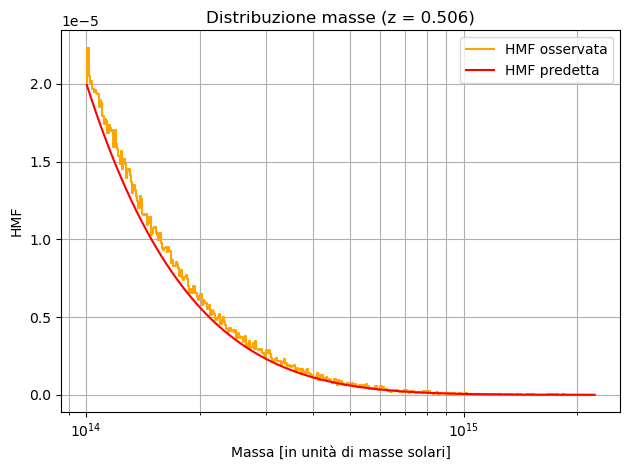

In [15]:
#Scriviamo HMF predetta, ottenuta con i parametri cosmologici fissati
mfunc1 = mass_function.massFunction(centri_bins1, z1, mdef = "vir", model = "despali16", q_out = "dndlnM" )

#Scriviamo HMF osservata
dlnM1 = np.diff( np.log(mass_bins1) ) #calcolo la differenza tra i logaritmi delle masse (già ottenuti nella sezione 1.3)
mfunc_oss1 = conteggi_bins1/( vol1*dlnM1 )

plt.figure()
plt.step(centri_bins1, mfunc_oss1, where="mid", color="orange", label = "HMF osservata" )
plt.plot(centri_bins1, mfunc1, label = "HMF predetta", color = "red" )
plt.xscale( "log" )
plt.xlabel( "Massa [in unità di masse solari]" )
plt.ylabel( "HMF" )
plt.title( f"Distribuzione masse (z = {z1})" )
plt.grid( True, which="both", ls = "-" )
plt.legend()
plt.tight_layout()
plt.show()

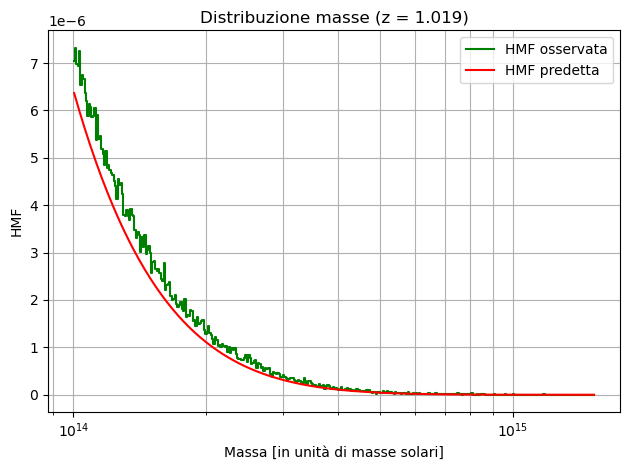

In [16]:
#Scriviamo HMF predetta, ottenuta con i parametri cosmologici fissati
mfunc2 = mass_function.massFunction(centri_bins2, z2, mdef = "vir", model = "despali16", q_out = "dndlnM" )

#Scriviamo HMF osservata
dlnM2 = np.diff( np.log(mass_bins2 ) ) #calcolo la differenza tra i logaritmi delle masse (già ottenuti nella sezione 1.3)
mfunc_oss2 = conteggi_bins2/( vol2*dlnM2)

plt.figure()
plt.step(centri_bins2, mfunc_oss2, where="mid", color="green", label = "HMF osservata" )
plt.plot(centri_bins2, mfunc2, label = "HMF predetta", color = "red" )
plt.xscale( "log" )
plt.xlabel( "Massa [in unità di masse solari]" )
plt.ylabel( "HMF" )
plt.title( f"Distribuzione masse (z = {z2})" )
plt.grid( True, which="both", ls = "-" )
plt.legend()
plt.tight_layout()
plt.show()

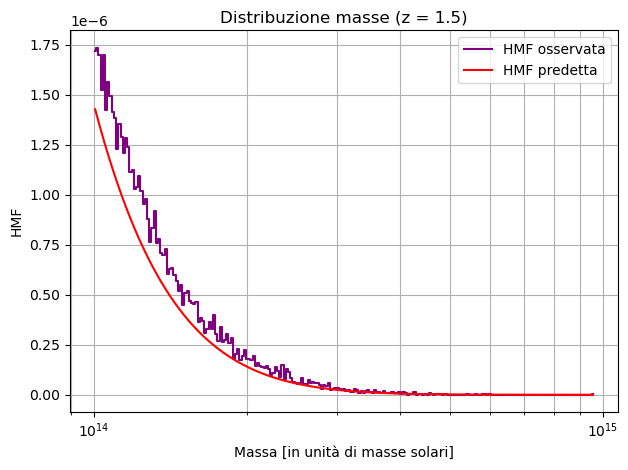

In [17]:
#Scriviamo HMF predetta, ottenuta con i parametri cosmologici fissati
mfunc3 = mass_function.massFunction(centri_bins3, z3, mdef = "vir", model = "despali16", q_out = "dndlnM" )

#Scriviamo HMF osservata
dlnM3 = np.diff(np.log(mass_bins3 ) ) #calcolo la differenza tra i logaritmi delle masse (già ottenuti nella sezione 1.3)
mfunc_oss3 = conteggi_bins3/( vol3*dlnM3 )

plt.figure()
plt.step(centri_bins3, mfunc_oss3, where="mid", color="purple", label = "HMF osservata" )
plt.plot(centri_bins3, mfunc3, label = "HMF predetta", color = "red" )
plt.xscale( "log" )
plt.xlabel( "Massa [in unità di masse solari]" )
plt.ylabel( "HMF" )
plt.title( f"Distribuzione masse (z = {z3})" )
plt.grid( True, which="both", ls = "-" )
plt.legend()
plt.tight_layout()
plt.show()

Osservando questi 3 plot sembra che i dati osservati siano in accordo con le predizioni teoriche, anche se il fit peggiora con l'aumentare del redshift e potrebbe essere migliorato.<br>
Proviamo a fare un test del $\chi^2$ per quantificare la bontà del modello per ogni plot. <br>
In questa analisi sto conteggiando ammassi che si presentano con una certa massa. Se ogni evento è indipendente dagli altri e la probabilità di osservarlo in un piccolo intervallo è costante, la statistica che descrive il numero di eventi è la distribuzione di Poisson.<br>
Ricordiamo che il $\chi^2$ è definito come segue: $$\chi^2=\sum_i \frac{(n_i-\mu_i)^2}{\sigma_i^2}$$ dove $n_i$ sono i conteggi di ciascun bin menter $\mu_i$ e $\sigma_i$ sono rispettivamente valore di aspettazione e deviazione standard (che stimo essere $\sqrt{n_i}$, supponendo che l'incertezza su un conteggio discreto segua una distribuzione di Poisson).

In [19]:
mu1 = mfunc1 * vol1 * dlnM1
sigma1 = np.sqrt(np.maximum(conteggi_bins1, 1))  # errore Poisson, se ho conteggi <1 (che darebbero problemi) pongo 1
chi2_1 = np.sum(((conteggi_bins1 - mu1) / sigma1) ** 2)
chi2_red_1 = chi2_1 / (len(conteggi_bins1) - 0)  # p=0 parametri liberi
print(f"Chi2 = {chi2_1:.2f}, Chi2 ridotto = {chi2_red_1:.2f}")

Chi2 = 1777.63, Chi2 ridotto = 4.34


In [20]:
mu2 = mfunc2 * vol2 * dlnM2
sigma2 = np.sqrt(np.maximum(conteggi_bins2, 1))  # errore Poisson
chi2_2 = np.sum(((conteggi_bins2 - mu2) / sigma2) ** 2)
chi2_red_2 = chi2_2 / (len(conteggi_bins2) - 0)  # p=0 parametri liberi
print(f"Chi2 = {chi2_2:.2f}, Chi2 ridotto = {chi2_red_2:.2f}")

Chi2 = 3714.42, Chi2 ridotto = 9.88


In [21]:
mu3 = mfunc3 * vol3 * dlnM3
sigma3 = np.sqrt(np.maximum(conteggi_bins3, 1))  # errore Poisson
chi2_3 = np.sum(((conteggi_bins3 - mu3) / sigma3) ** 2)
chi2_red_3 = chi2_3 / (len(conteggi_bins3) - 0)  # p=0 parametri liberi
print(f"Chi2 = {chi2_3:.2f}, Chi2 ridotto = {chi2_red_3:.2f}")

Chi2 = 2891.25, Chi2 ridotto = 12.74


Anche l'analisi del $\chi^2$ ridotto evidenzia che diminuendo il redshift il modello teorico fornisce una descrizione statisticamente più compatibile con i dati osservati.

## 3. INFERENZA BAYESIANA CONSIDERANDO UN UNIVERSO PIATTO

### 3.1 RICHIAMI DI STATISTICA BAYESIANA

Per effettuare analisi statistiche esistono due approcci principali: l’approccio frequentista e quello bayesiano.<br>
Nell’approccio frequentista si parte da un’ipotesi, e si immagina di poter ripetere l’esperimento molte volte per valutare quanto i dati osservati siano compatibili con quell’ipotesi.<br>
Nell’approccio bayesiano, invece, i dati osservati sono considerati fissi. Conosciamo (o assumiamo) la probabilità di osservare quei dati dato un insieme di parametri del modello, e vogliamo invece ricavare la distribuzione di probabilità dei parametri alla luce dei dati e del modello. Questa distribuzione è chiamata **posterior** ($P(p|d,M)$).<br>
Secondo il teorema di Bayes, il posterior è proporzionale al prodotto di:
* **likelihood** ($P(d|p,M)$): la probabilità di osservare i dati dato un certo valore dei parametri;
* **prior** ($P(p|M)$): la probabilità assegnata ai parametri prima di osservare i dati.

In altre parole, l’obiettivo della statistica bayesiana è aggiornare la nostra conoscenza sui parametri (il prior) incorporando l’informazione contenuta nei dati (la likelihood) per ottenere la distribuzione aggiornata (il posterior).

Il **teorma di Bayes** in formule diventa: $$P(p|d,M)=\frac{P(d|p,M)P(p|M)}{P(d|M)}$$
dove $P(d|M)$ è l'evidenza, la probabilità dei dati dato un modello, non dipende dai parametri e dal momento che le proprietà statistiche non dipendono dalla normalizzazione è un termine che posso ignorare.

Si tenga presente che la prior non è semplicemente la distribuzione di probabilità dei parametri, ma rappresenta l’informazione che possediamo prima di osservare i nuovi dati. Questa informazione può derivare da conoscenze pregresse ottenute da esperimenti precedenti oppure da vincoli fisici che impongono certi limiti ai valori dei parametri.

L'equazione di Bayes bilancia l'informazione che ho prima dell'esperimento con quella che mi portano i dati. Se questi ultimi risultano molto vincolanti, l'informazione contenuta nella Likelihood diventa importante, viceversa se ho pochi dati prevale l'informazione contenuta nella prior.

In astrofisica e cosmologia questo approccio bayesiano è preferito dal momento che abbiamo un'unica realizzazione di universo. Spesso si decide di mettere un prior piatto per essere agnostici sull'informazione contenuta nella prior, ciò equivale a supporre a priori che i parametri abbiano distribuzioni uniformi (non avendo sufficienti dati per fare altre previsioni).

### 3.2 INTRODUZIONE TEORICA

In questa sezione andremo ad effettuare un'analisi statistica bayesiana per **stimare i parametri cosmologici $\sigma_8$ e $\Omega_m$**, mantenendo fissati $H_0$, $\Omega_b$ e $ns$. <br>
Il modello cosmologico che andiamo a considerare in questa fase di inferenza bayesiana è $\Lambda$CDM, ovvero un universo piatto.

Come prima cosa andremo a **definire la cosmologia** imponendo i seguenti valori per i parametri fissati:
* la costante di Hubble $H_0=67.77$
* la densità di barioni $\Omega_b=0.049$
* l'indice spettrale delle fluttuazioni primordiali di densità $ns=0.95$ 

Poi andremo a scrivere le **funzioni prior, Likelihood e posterior**. <br>
Per ogni bin di massa, fissato un certo redshift, si ha un numero osservato di ammassi $N_{oss}$, il numero teorico atteso invece $\mu$ per ogni bin si ottiene dalla HMF teorica, come abbiamo già visto nel test del $\chi^2$ della sezione 2.2. Seguendo il suggerimento della consegna, si assuma che il numero di oggetti osservato in un determinato bin di massa sia una realizzazione poissoniana del numero teorico atteso predetto dalla HMF. Quindi avrò che $$P(N_{oss}^i)=\frac{\mu^{N_{oss}^i}e^{-\mu}}{N_{oss}^i!}$$ per il bin i-esimo, dove la Likelihood totale sarà il prodotto di questa distribuzione su tutti i bin: $$P(d|p,M)=\mathcal{L}=\prod_i P(N_{oss}^i)$$
La prior invece si assume essere uniforme con valori $0.1<\sigma_8,\Omega_m<1.1$. <br>
Spesso, in statistica bayesiana, si lavora con il logaritmo della posterior $\ln{P(p|d,M)}$ anziché con la posterior stessa (e quindi col $\ln{\mathcal{L}}$). Questo è possibile perché massimizzare la posterior o il suo logaritmo non cambia il risultato, dato che il logaritmo è una funzione monotona crescente. Dal punto di vista computazionale, lavorare con i logaritmi è molto più comodo: il logaritmo trasforma la produttoria dei termini della likelihood in una sommatoria, che è più facile da gestire sia nel calcolo sia nella derivazione.

Definite queste 3 funzioni è necessario andare a trovare i parametri $\sigma_8$ e $\Omega_m$ che massimizzano la posterior. Per farlo useremo una funzione della libreria SciPy che serve per trovare il minimo di una funzione:

Dal momento che il nostro obbiettivo è massimizzare la posterior (non minimizzarla) andremo a **minimizzare $-\ln{P(p|d,M)}$**. <br>
Per definire la funzione che restituisce il valore negativo del logaritmo della posterior usiamo una lambda function (come abbiamo fatto a lezione), che rappresenta semplicemente un modo alternativo di scrivere una funzione tramite "def":

In statistica bayesiana ci interessa conoscere l’intera distribuzione di probabilità dei parametri. Il valore che massimizza la posterior, da solo, non ci dice nulla sull’incertezza delle stime, sull’ampiezza della distribuzione attorno al massimo, sulle correlazioni tra i parametri, né sulla forma complessiva della distribuzione. Per ottenere queste informazioni è necessario esplorare lo spazio dei parametri nelle vicinanze del massimo trovato, così da caratterizzare l’intera posterior e non solo il suo punto di massimo. <br>
Per stimare le distribuzioni posteriori dei parametri cosmologici si utilizza l'**algoritmo emcee** che è una libreria di Python che implementa un metodo di campionamento MCMC (Markov Chain Monte Carlo). L'idea è costruire una catena di Markov che, dopo un numero finito di passi, produce campioni distribuiti come la posterior. Una catena di Markov è una sequenza di valori dei parametri generata ad ogni step, dove ogni punto trovato dipende dal precedente. Dopo un periodo inziziale chiamato "BURN-IN" la catena dovrebbe "convergere", continuando ad oscillare all'interno di un intervallo. Nell'algoritmo emcee non si ha una sola catena, ma un numero fissato di *walkers* che esplorano contemporaneamente lo spazio dei parametri attorno ai valori massimi. Facendo un plot di queste catene parallele, se la simulazione va a buon fine, le traiettorie dei vari walkers doverbbero "mescolarsi". Unendo i campionamenti dei vari *walker* è possibile costruire la distribuzione dei parametri cercata: la posterior. <br> 
Ulteriori dettagli verranno approfonditi in seguito, nei commenti relativi ai codici.

### 3.3 DISTRIBUZIONE STATISTICA dei PARAMETRI $\sigma_8$ e $\Omega_m$

Si importano di seguito le librerie necessarie.

In [18]:
import math
from scipy.stats import norm, lognorm
from scipy.optimize import minimize
import time as tm
import emcee

Definisco il **logaritmo della prior, likelihood e posterior**.

In [19]:
def log_prior(p): #distribuzione della prior
    sigma8, Om0 = p #array che contiene i parametri cosmologici che voglio stimare
    if 0.1<=sigma8<=1.1 and 0.1<=Om0<=1.1:
        return 0.0 #sarebbe log di 1 che è il prior piatto
    return -np.inf #punto a probabilità 0

def log_likelihood(p, Noss, centri_bins, z, vol, dlnM): #i dati sono le altezze e i relativi errori
    sigma8, Om0 = p
    params = {'flat': True, 'H0': 67.77, 'Om0': Om0, 'Ob0': 0.049, 'sigma8': sigma8, 'ns': 0.96} #dizionario parametri, due sono variabili
    cosmology.addCosmology('myCosmo', params)
    cosmo = cosmology.setCosmology('myCosmo')
    mfunc = mass_function.massFunction(centri_bins, z, mdef = "vir", model = "despali16", q_out = "dndlnM" )
    #Valore atteso conteggi
    mu = mfunc * vol * dlnM
    # Controllo validità (evito log di valori <=0)
    if not np.all(mu > 0):
        return -np.inf
    #Calcolo log likelihood
    logL = np.sum(Noss * np.log(mu) - mu)
    return logL 

def log_posterior(p, Noss, centri_bins, z, vol, dlnM):
    logPr = log_prior(p)
    if not np.isfinite(logPr):
        return -np.inf
    #Calcolo la posterior
    logPost = logPr + log_likelihood(p, Noss, centri_bins, z, vol, dlnM)
    return logPost

# Definizione della funzione da minimizzare (negativa della log-posterior)
nll = lambda *args: -log_posterior(*args)

Da notare che nella definizione della Likelihood non abbiamo inserito il termine col fattoriale dal momento che non dipende dai parametri, quindi quando si cerca di massimizzare il Likelihood questo termine non influisce sulla posizione del massimo.

Valuto i **valori di best fit** per i 3 bin di redshift. Per i parametri iniziali utilizzo $0.8$ e $0.3$ essendo i valori veri attesi a $\sigma_8=0.81$ e $\Omega_m=0.31$.

In [20]:
# Fisso il seed per riproducibilità
np.random.seed(42)

# Punto iniziale per i parametri [sigma8, Om0]
initial1 = np.array([0.8, 0.3]) * (1 + 0.01 * np.random.randn(2))

# Ottimizzazione: args contiene i dati osservati e parametri del caso z1
args1=(conteggi_bins1, centri_bins1, z1, vol1, dlnM1)
bounds1 = [( 0.1, 1.1 ), ( 0.1, 0.99 )] # ho aggiunto una condizione che limita i parametri in questo intervallo per evitare di otterere errori
                                        # per Om se impongo l'estremo superiore a 1.1, mi da errore dicendo che deve essere <1
soln1 = minimize(nll, initial1, args1, bounds=bounds1)

# Parametri ottimali
sigma8_bf1, Om0_bf1 = soln1.x
print("Best fit con z1 di sigma8, Om0:", soln1.x)

# Fisso il seed per riproducibilità
np.random.seed(42)

# Punto iniziale per i parametri [sigma8, Om0]
initial2 = np.array([0.8, 0.3]) * (1 + 0.01 * np.random.randn(2))

# Ottimizzazione: args contiene i dati osservati e parametri del caso z1
args2=(conteggi_bins2, centri_bins2, z2, vol2, dlnM2)
bounds2 = [( 0.1, 1.1 ), ( 0.1, 0.99 )]
soln2 = minimize(nll, initial2, args2, bounds=bounds2)

# Parametri ottimali
sigma8_bf2, Om0_bf2 = soln2.x
print("Best fit con z2 di sigma8, Om0:", soln2.x)

# Fisso il seed per riproducibilità
np.random.seed(42)

# Punto iniziale per i parametri [sigma8, Om0]
initial3 = np.array([0.8, 0.3]) * (1 + 0.01 * np.random.randn(2))

# Ottimizzazione: args contiene i dati osservati e parametri del caso z1
args3=(conteggi_bins3, centri_bins3, z3, vol3, dlnM3)
bounds3 = [( 0.1, 1.1 ), ( 0.1, 0.99 )]
soln3 = minimize(nll, initial3, args3, bounds=bounds3)

# Parametri ottimali
sigma8_bf3, Om0_bf3 = soln3.x
print("Best fit con z3 di sigma8, Om0:", soln3.x)

Best fit con z1 di sigma8, Om0: [0.80397371 0.33287184]
Best fit con z2 di sigma8, Om0: [0.80397371 0.35148232]
Best fit con z3 di sigma8, Om0: [0.80397371 0.37047485]


I parametri stimati nei tre casi risultano coerenti con i valori attesi. Tuttavia, per valutarne in modo rigoroso la compatibilità sia tra loro sia con i valori teorici di riferimento, è opportuno ricavare la distribuzione statistica dei parametri.

Si procede con l’implementazione del **campionamento MCMC tramite emcee**. Si eseguono le catene per un numero sufficiente di passi e utilizzando 20 *walkers*. Si ricorda che il numero di *walkers* ottimale per esplorare bene lo spazio e ottenere una catena affidabile è un multiplo del numero di parametri.<br>
Dopo aver campionato i parametri, si riportano — per ciascun bin di redshift — le **20 catene sovrapposte**. Ogni catena parte da un punto casuale, ottenuto perturbando leggermente il valore che massimizza la posterior. Nei primi centinaia di step è normale osservare oscillazioni irregolari: i walkers stanno ancora esplorando lo spazio dei parametri alla ricerca delle regioni di alta probabilità. Per questo motivo, quando in seguito si andrà a rappresentare la distribuzione dei parametri utilizzando i campioni raccolti, sarà necessario scartare i primi step delle catene: questa fase iniziale viene infatti considerata burn-in, e non rappresenta ancora un campionamento stabile della posterior.

In [27]:
#Parto da una posizione casuale, con 20 walkers per 2 parametri
pos1 = soln1.x *(1+ 1e-2 * np.random.randn(20, 2))
nwalkers1, ndim1 = pos1.shape
#Campionatore
sampler1 = emcee.EnsembleSampler(nwalkers1, ndim1, log_posterior, args=args1)
#Simulazione MCMC per campionare i parametri
sampler1.run_mcmc(pos1, 1800, progress=True)

100%|██████████| 1800/1800 [1:26:37<00:00,  2.89s/it]


State([[0.82137034 0.31503413]
 [0.82227747 0.3142823 ]
 [0.82013239 0.31724626]
 [0.82476274 0.31292586]
 [0.82221016 0.31509855]
 [0.82688051 0.31028421]
 [0.82146303 0.31558003]
 [0.82433448 0.31344787]
 [0.82135919 0.31519724]
 [0.82344144 0.31302464]
 [0.8248778  0.31193959]
 [0.82079756 0.31526919]
 [0.82209175 0.31541361]
 [0.82249742 0.31498645]
 [0.82095425 0.31592611]
 [0.82203268 0.31448802]
 [0.82454582 0.31325634]
 [0.82151921 0.31551428]
 [0.82078197 0.31627313]
 [0.82049076 0.31682437]], log_prob=[1002541.67374349 1002542.37553184 1002540.55219835 1002541.50003706
 1002542.40439163 1002540.49241555 1002542.34650722 1002541.29277294
 1002542.00597407 1002542.13378231 1002542.21207219 1002540.16967487
 1002541.87045742 1002542.11371459 1002542.03380001 1002542.22866643
 1002541.16796546 1002542.38822341 1002541.8141493  1002541.1134434 ], blobs=None, random_state=('MT19937', array([2942518959, 2246931027, 4223534240, 3182238341, 4127221247,
        216074760, 3852551533, 3

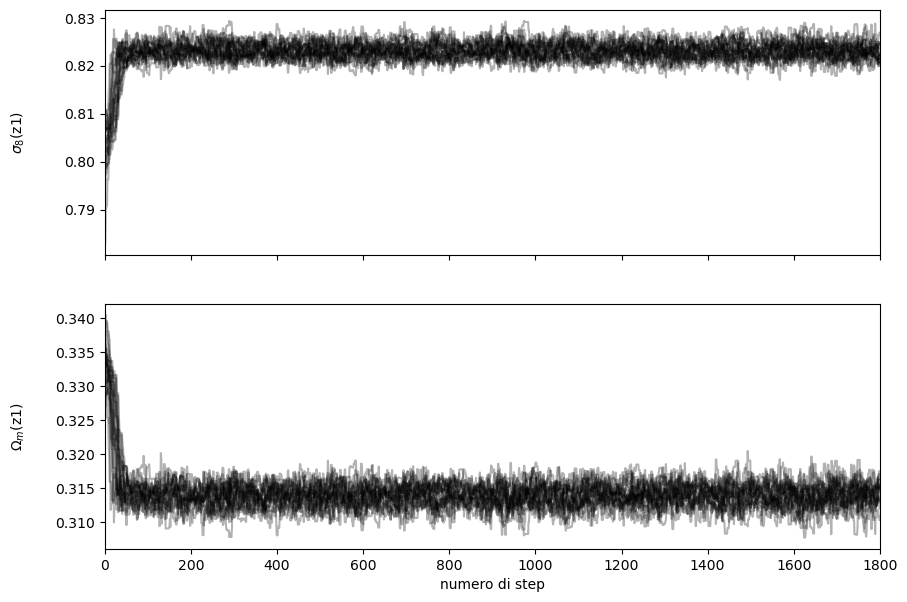

In [28]:
#Grafico che mostra l'evoluzione delle catene per i 2 parametri
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples1 = sampler1.get_chain() #Ottengo i campioni generati dal campionatore sampler1
labels1 = [r"$\sigma_8$(z1)", r"$\Omega_m$(z1)"]
for i in range(ndim1):
    ax = axes[i]
    ax.plot(samples1[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples1))
    ax.set_ylabel(labels1[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("numero di step");
plt.show()

Salvo i parametri campionati dalle catene relative a $z_1$ in un file:

In [29]:
nstep1, nwalkers1, ndim1 = samples1.shape
records1 = []
for w in range(nwalkers1):
    for i in range(nstep1):
        records1.append([i, w, samples1[i, w, 0], samples1[i, w, 1]])

df1 = pd.DataFrame(records1, columns=["step", "walker", "sigma8", "Omega_m"])
df1.to_csv("samples1_with_walkers.csv", index=False)

In [31]:
#Conto i campioni totali da utilizzare per la distribuzione posterior
flat_samples1 = sampler1.get_chain(discard=150, flat=True) 
print(flat_samples1.shape)

(33000, 2)


Per ognuno dei due parametri si ha un **numero di campioni per graficare la posterior** pari a $(N_{step}-N_{discard})N_{walkers}$.

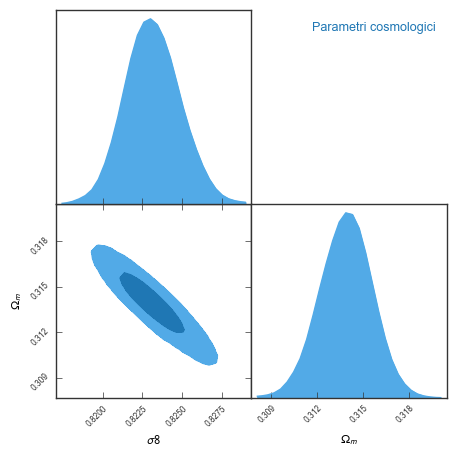

In [32]:
import pygtc #libreria che fa le distribuzioni marginali
GTC = pygtc.plotGTC(chains=flat_samples1, #passa campioni fusi (tutti insieme di tutti i walker) alla funzione
                    paramNames=[r'$\sigma8$',r'$\Omega_m$'],
                    chainLabels=['Parametri cosmologici'],
                    figureSize='MNRAS_page')
plt.show()

In [33]:
media1 = np.mean(flat_samples1, axis=0)
var1  = np.var(flat_samples1, axis=0)
rho1 = np.corrcoef(flat_samples1[:,0], flat_samples1[:,1])[0,1] #specifico l'elemente nella riga 0 e colonna 1 della matrice di correlazione

print("sigma8 (z1): media", media1[0], ", varianza", var1[0])
print("Om0 (z1): media", media1[1], ", varianza", var1[1])
print("Coefficiente correlazione", rho1)

sigma8 (z1): media 0.823135734233009 , varianza 2.831031469171358e-06
Om0 (z1): media 0.3138620573361226 , varianza 2.7024499489792113e-06
Coefficiente correlazione -0.9642642524382177


In [21]:
#Parto da una posizione casuale, con 20 walkers per 2 parametri
pos2 = soln2.x *(1+ 1e-2 * np.random.randn(20, 2))
nwalkers2, ndim2 = pos2.shape
#Campionatore
sampler2 = emcee.EnsembleSampler(nwalkers2, ndim2, log_posterior, args=args2)
#Simulazione MCMC per campionare i parametri
sampler2.run_mcmc(pos2, 2000, progress=True)

100%|██████████| 2000/2000 [1:45:31<00:00,  3.17s/it]  


State([[0.8268441  0.31243884]
 [0.82759567 0.31071548]
 [0.82656165 0.31329961]
 [0.82869829 0.31006001]
 [0.82636965 0.31317005]
 [0.82778737 0.31082556]
 [0.82946259 0.30908015]
 [0.82855664 0.31027475]
 [0.82750167 0.31282557]
 [0.8279808  0.31048584]
 [0.82781127 0.31104917]
 [0.82794984 0.31124877]
 [0.82865288 0.31072091]
 [0.82774033 0.31135025]
 [0.83112164 0.3059609 ]
 [0.82717196 0.31208773]
 [0.82647651 0.31258436]
 [0.82936473 0.30905087]
 [0.82761753 0.3107367 ]
 [0.82965536 0.30909131]], log_prob=[848104.81023953 848103.66602764 848104.78930049 848105.31638328
 848104.42070009 848104.9159568  848104.71107713 848105.36062979
 848102.87580493 848104.83749765 848105.32662116 848105.38700316
 848104.23173433 848105.42686168 848102.64298154 848105.16836905
 848103.55847309 848104.95678535 848103.87681321 848103.93838268], blobs=None, random_state=('MT19937', array([2967425205, 4071699659, 1276102269, 1755552204, 2910846012,
       3943421087, 1348819043, 3520886575, 280714141

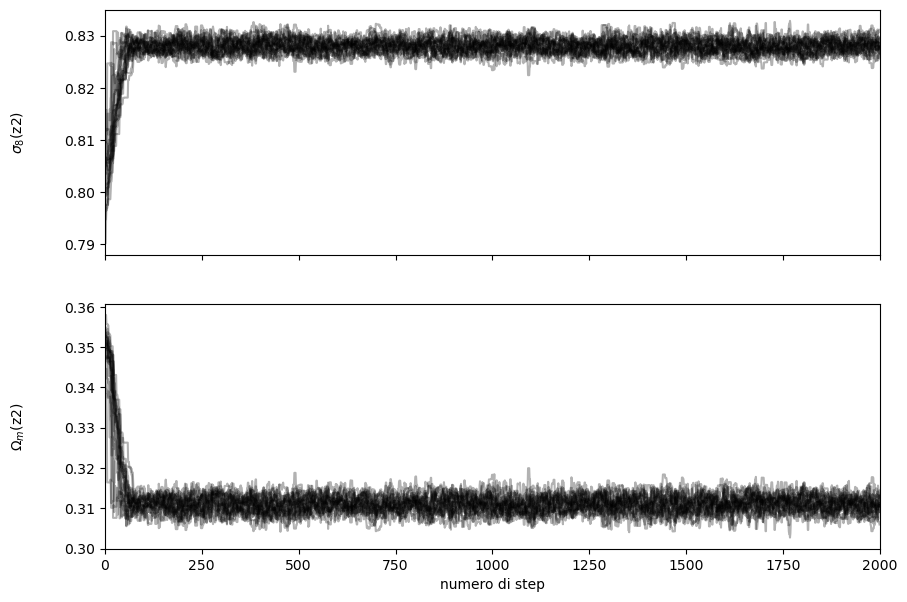

In [22]:
#Grafico che mostra l'evoluzione delle catene per i 2 parametri
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples2 = sampler2.get_chain() #Ottengo i campioni generati dal campionatore sampler2
labels2 = [r"$\sigma_8$(z2)", r"$\Omega_m$(z2)"]
for i in range(ndim2):
    ax = axes[i]
    ax.plot(samples2[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples2))
    ax.set_ylabel(labels2[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("numero di step");
plt.show()

Salvo i parametri campionati dalle catene relative a $z_2$ in un file:

In [23]:
nstep2, nwalkers2, ndim2 = samples2.shape
records2 = []
for w in range(nwalkers2):
    for i in range(nstep2):
        records2.append([i, w, samples2[i, w, 0], samples2[i, w, 1]])

df2 = pd.DataFrame(records2, columns=["step", "walker", "sigma8", "Omega_m"])
df2.to_csv("samples2_with_walkers.csv", index=False)

In [24]:
#Conto i campioni totali da utilizzare per la distribuzione posterior
flat_samples2 = sampler2.get_chain(discard=200, flat=True) 
print(flat_samples2.shape)

(36000, 2)


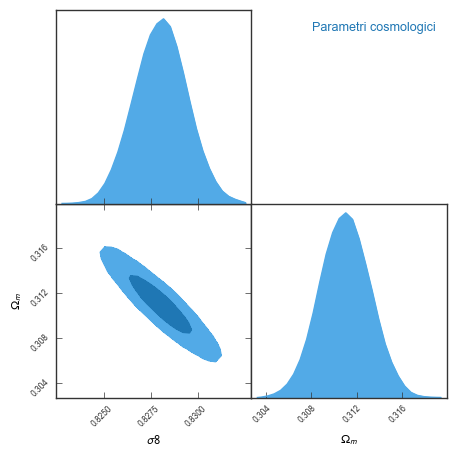

In [25]:
import pygtc #libreria che fa le distribuzioni marginali
GTC = pygtc.plotGTC(chains=flat_samples2, #passa campioni fusi (tutti insieme di tutti i walker) alla funzione
                    paramNames=[r'$\sigma8$',r'$\Omega_m$'],
                    chainLabels=['Parametri cosmologici'],
                    figureSize='MNRAS_page')
plt.show()

In [26]:
media2 = np.mean(flat_samples2, axis=0)
var2 = np.var(flat_samples2, axis=0)
rho2 = np.corrcoef(flat_samples2[:,0], flat_samples2[:,1])[0,1]

print("sigma8 (z2): media", media2[0], ", varianza", var2[0])
print("Om0 (z2): media", media2[1], ", varianza", var2[1])
print("Coefficiente correlazione", rho2)

sigma8 (z2): media 0.8280125642578404 , varianza 1.8603509589591352e-06
Om0 (z2): media 0.31096523794738123 , varianza 4.579983967799454e-06
Coefficiente correlazione -0.9757505224217645


In [34]:
#Parto da una posizione casuale, con 20 walkers per 2 parametr
pos3 = soln3.x *(1+ 1e-2 * np.random.randn(20, 2))
nwalkers3, ndim3 = pos3.shape
#Campionatore
sampler3 = emcee.EnsembleSampler(nwalkers3, ndim3, log_posterior, args=args3)
#Simulazione MCMC per campionare i parametri
sampler3.run_mcmc(pos3, 2000, progress=True)

100%|██████████| 2000/2000 [11:59<00:00,  2.78it/s]


State([[0.82234316 0.32532269]
 [0.82246663 0.32681106]
 [0.82242233 0.325193  ]
 [0.82350246 0.32357286]
 [0.81987971 0.33250023]
 [0.8224919  0.3258352 ]
 [0.82221718 0.32604157]
 [0.82339676 0.32420497]
 [0.82255339 0.32449752]
 [0.82308965 0.32518976]
 [0.81944062 0.33288365]
 [0.82296939 0.32466364]
 [0.81925406 0.33296657]
 [0.82170531 0.32737527]
 [0.82513093 0.32073642]
 [0.82358465 0.32241064]
 [0.82017283 0.33129477]
 [0.8236236  0.32296139]
 [0.82325406 0.32495747]
 [0.819775   0.3311836 ]], log_prob=[285905.6561757  285906.489608   285905.74057889 285906.41081074
 285905.80258131 285906.67373149 285906.33314387 285906.53653063
 285904.87074377 285906.53868415 285905.58463829 285906.52803689
 285905.22956972 285906.48856656 285905.19318138 285905.09103918
 285906.14427401 285906.08469261 285906.3911693  285904.87918711], blobs=None, random_state=('MT19937', array([2856400188, 3352316604, 3308729547,  214321229, 3087090413,
        370169243, 2571387652, 4282587030, 387782976

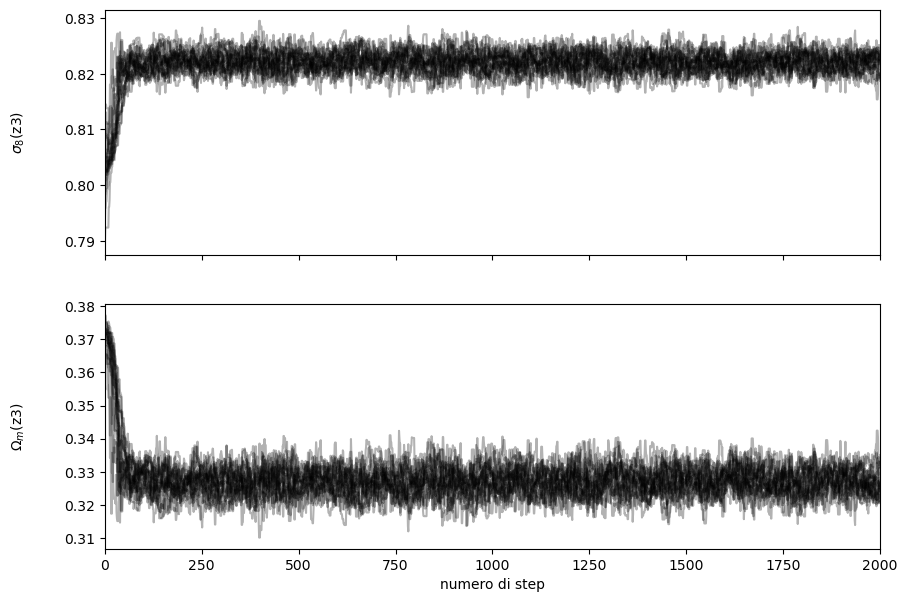

In [35]:
#Grafico che mostra l'evoluzione delle catene per i 2 parametri
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples3 = sampler3.get_chain() #Ottengo i campioni generati dal campionatore sampler3
labels3 = [r"$\sigma_8$(z3)", r"$\Omega_m$(z3)"]
for i in range(ndim3):
    ax = axes[i]
    ax.plot(samples3[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples3))
    ax.set_ylabel(labels3[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("numero di step");
plt.show()

Salvo i parametri campionati dalle catene relative a $z_3$ in un file:

In [36]:
nstep3, nwalkers3, ndim3 = samples3.shape
records3 = []
for w in range(nwalkers3):
    for i in range(nstep3):
        records3.append([i, w, samples3[i, w, 0], samples3[i, w, 1]])

df3 = pd.DataFrame(records3, columns=["step", "walker", "sigma8", "Omega_m"])
df3.to_csv("samples3_with_walkers.csv", index=False)

In [37]:
flat_samples3 = sampler3.get_chain(discard=200, flat=True) #campioni distribuzione a posteriori dopo 100 passi (1900x32 per ogni parametro)
print(flat_samples3.shape)

(36000, 2)


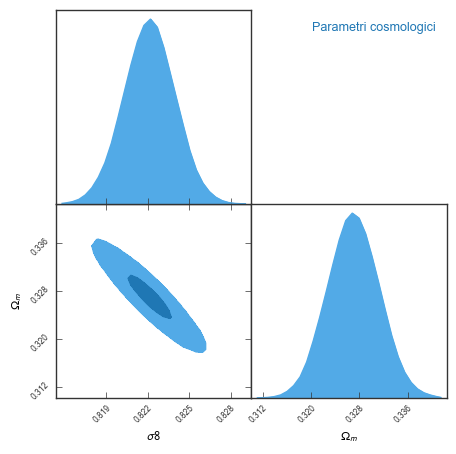

In [38]:
import pygtc #libreria che fa le distribuzioni marginali
GTC = pygtc.plotGTC(chains=flat_samples3, #passa campioni fusi (tutti insieme di tutti i walker) alla funzione
                    paramNames=[r'$\sigma8$',r'$\Omega_m$'],
                    chainLabels=['Parametri cosmologici'],
                    figureSize='MNRAS_page')
plt.show()

In [39]:
media3 = np.mean(flat_samples3, axis=0)
var3 = np.var(flat_samples3, axis=0)
rho3 = np.corrcoef(flat_samples3[:,0], flat_samples3[:,1])[0,1]

print("sigma8 (z3): media", media3[0], ", varianza", var3[0])
print("Om0 (z3): media", media3[1], ", varianza", var3[1])
print("Coefficiente correlazione", rho3)

sigma8 (z3): media 0.8221212882207 , varianza 3.2109745313461628e-06
Om0 (z3): media 0.32702471965580493 , varianza 1.705095967303603e-05
Coefficiente correlazione -0.9822014092786474


Una volta ottenute le catene, è utile valutare il **tempo di autocorrelazione**, che misura quanto i campioni consecutivi della catena siano dipendenti tra loro. In pratica, indica ogni quanti passi si può considerare di aver ottenuto un campione “indipendente”.
Di conseguenza, per stimare il numero effettivo di campioni indipendenti, si divide il numero totale di step per il tempo di autocorrelazione. In generale per ottenere per ottenere una buona catena con N step si dovrebbe avere: $\frac{N}{\tau}\ge50$.

In [40]:
tau1 = sampler1.get_autocorr_time()
tau2 = sampler2.get_autocorr_time()
tau3 = sampler3.get_autocorr_time()
print("tempo di autocorrelazione catena con z1:", tau1)
print("tempo di autocorrelazione catena con z2:", tau2)
print("tempo di autocorrelazione catena con z3:", tau3)

tempo di autocorrelazione catena con z1: [28.52692854 27.90723609]
tempo di autocorrelazione catena con z2: [36.33943853 36.55651344]
tempo di autocorrelazione catena con z3: [36.57096306 36.1275666 ]


Ho scelto infatti un numero di step per le catene suffciente a soddisfare la relazione con $\tau$.

Come già specificato, nella fase iniziale della catena i campioni non sono ancora rappresentati dalla disrtibuzione a posteriori e per questo vengono scartati. Questo campionamento iniziale serva a "dimenticare" le condizioni iniziali e permette alla catena di convergere verso la distribuzione stazionaria. <br>
Abbiamo misurato quanto i campioni consecutivi della catena sono dipendenti tra loro stimando il tempo di autocorrelazione: se quest'ultimo è alto è servono molti passi per ottenere un campione indipendente. La fase iniziale di burn-in sarà quindi almeno qualche multiplo del tempo di autocorrelazione. In questa analisi, si è scelto di scartare i primi 150 campioni per le catene relative a $z_1$, e i primi 200 campioni per le catene relative a $z_2$ e $z_3$: si è scelto un numero maggiore in questi ultimi casi dal momento che anche il tempo di autocorrelazione lo era. 

### 3.4 ANALISI delle CATENE e della POSTERIOR

Osservando il grafico che riporta i valori dei parametri attraverso le catene si può vedere come, dopo una prima fase di burn-in, esse continuino ad oscillare all'interno di un intervallo, intorno ai valori $\sigma_8\sim 0.82/3$ e $\Omega_m\sim 0.31$, producendo una sorta di "rumore bianco", che è esattamente ciò che ci aspettiamo. <br>

Per quanto riguarda la distribuzione delle posterior invece, dal plot a coppie si osserva una "nuvola" allungata e inclinata: i parametri $\Omega_m$ e $\sigma_8$ sembrano **anticorrelati**. Si può concludere che il nostro dataset (conteggio degli ammassi osservato) è sensibile ad una particolare combinazione di parametri cosmologici $\Omega_m$ e $\sigma_8$, quindi per ottenere lo stesso conteggio di ammassi di galassie aumentando un parametro, dovrei diminuire l'altro. Questa anticorrelazione tra i paramteri è indice del fatto che i parametri sono degeneri: per diverse combinazioni dei parametri cosmologici ottengo la stessa Likelihood.

Per quanto riguarda le **distribuzioni marginali dei 2 parametri** noto che presentano una forma approssimativamente gaussiana, tuttavia si può notare come sia presente una lieve antisimmetria .<br>
Si riporta di seguito i valori ottenuti per i best fit, per la media e per la varianza:

In [41]:
dati_sigma8 = {
    "Best Fit": [sigma8_bf1, sigma8_bf2 , sigma8_bf3],
    "Media":    [media1[0], media2[0], media3[0]],
    "Varianza": [var1[0], var2[0], var3[0]]
} #[0]perchè sto considerando il primo parametro

# Creazione tabella con indici z1, z2, z3
df = pd.DataFrame(dati_sigma8, index=["z1", "z2", "z3"])

print("Risultati ottenuti per sigma8:", df)

Risultati ottenuti per sigma8:     Best Fit     Media  Varianza
z1  0.803974  0.823136  0.000003
z2  0.803974  0.828013  0.000002
z3  0.803974  0.822121  0.000003


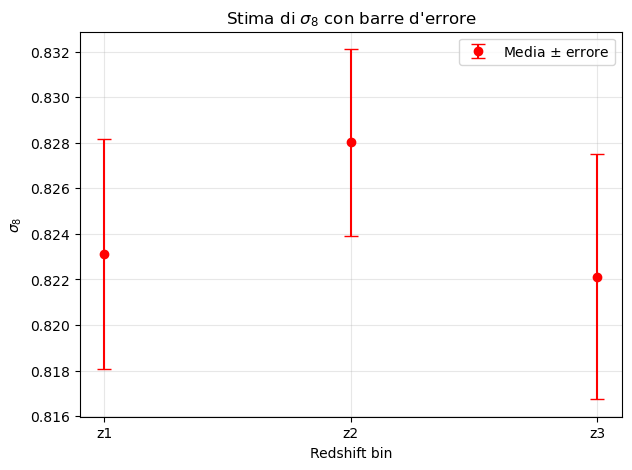

In [42]:
# Estraggo valori
z = df.index
media = df["Media"].values
var=df["Varianza"].values
errore=np.sqrt(var)
# Grafico con barre d'errore
plt.figure(figsize=(7,5))
plt.errorbar(z, media, yerr=3*errore, fmt='o', capsize=5, color="red", label=r"Media $\pm$ errore")

plt.xlabel("Redshift bin")
plt.ylabel(r"$\sigma_8$")
plt.title(r"Stima di $\sigma_8$ con barre d'errore")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [43]:
dati_Om0 = {
    "Best Fit": [Om0_bf1, Om0_bf2 , Om0_bf3],
    "Media":    [media1[1], media2[1], media3[1]],
    "Varianza": [var1[1], var2[1], var3[1]]
} #[1] perchè sto considerando il secondo parametro

# Creazione tabella con indici z1, z2, z3
df = pd.DataFrame(dati_Om0, index=["z1", "z2", "z3"])

print("Risultati ottenuti per Om0:", df)

Risultati ottenuti per Om0:     Best Fit     Media  Varianza
z1  0.332872  0.313862  0.000003
z2  0.351482  0.310965  0.000005
z3  0.370475  0.327025  0.000017


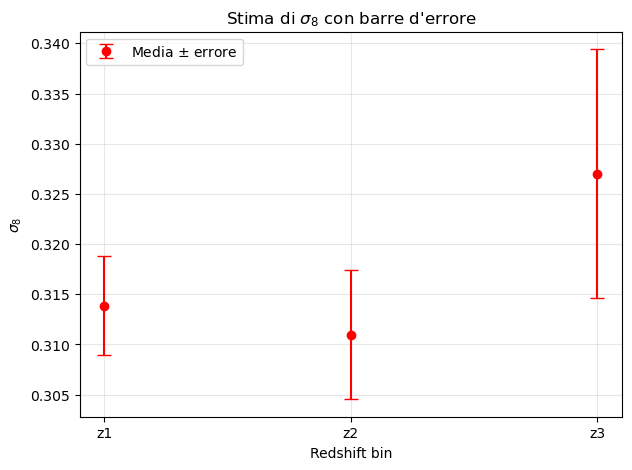

In [44]:
# Estraggo valori
z = df.index
media = df["Media"].values
var = df["Varianza"].values
errore = np.sqrt(var)
# Grafico con barre d'errore
plt.figure(figsize=(7,5))
plt.errorbar(z, media, yerr=3*errore, fmt='o', capsize=5, color="red", label=r"Media $\pm$ errore")

plt.xlabel("Redshift bin")
plt.ylabel(r"$\sigma_8$")
plt.title(r"Stima di $\sigma_8$ con barre d'errore")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Si può notare dai **grafici delle compatibilità** che i valori ottenuti per i due paramenti nei 3 casi (3 bin di redshift) sono tra loto compatibili a meno di 3 deviazioni standard. <br>
Si nota però che i valori di best fit trovati minimizzando la posterior non rientrano in questi intervalli. Questo lo si può vedere anche dalle catene dal momento che si parte da un parametro arbitrariamente vicino al valore di best fit per poi stabilizzarsi attorno al valore medio. Ho provato quindi a partire da una posizione più vicina al valore di best fit per $z_1$ (modificando la definizione di "pos1") tuttavia anche in quel caso la catena non si stabilizza attorno al valore di best fit.

A questo punto ci si potrebbe chiedere se abbia senso **combinare i dati relativi ai tre bin di redshift in un’unica analisi**, così da ottenere un campione più numeroso. L’idea sarebbe quella di costruire un istogramma unico contenente tutti gli ammassi, senza suddividerli nei tre sottogruppi di redshift.<br>
Tuttavia, sorge un problema nel momento in cui si vuole confrontare la distribuzione osservata con quella predetta dalla Halo Mass Function (HMF). La HMF infatti richiede come input un valore preciso di redshift, poiché il numero di ammassi attesi dipende da $z$. Se si fondessero i tre dataset in un unico insieme, non sarebbe più possibile associare un singolo redshift ai dati combinati, e quindi non sarebbe possibile fittare correttamente la distribuzione osservata con la HMF.<br>
Possiamo quindi concludere che unire i dati dei tre bin di redshift in un’unica distribuzione non è appropriato, perché i conteggi andrebbero confrontati con modelli HMF diversi a seconda del redshift. Ogni bin deve quindi essere trattato separatamente.

### 3.5 POSSIBILI SVILUPPI

Si riportano di seguito alcuni **possibili sviluppi futuri** relativi all'analisi precedentemente effettuata.

**VERIFICA CONVERGENZA CATENE**

Si potrebbe verificare la **convergenza delle catene** usando il **metodo di Gelmann-Rubin**.<br>
Questo metodo consiste nel calcolare $$R^2=\frac{\text{varianza medie}}{\text{media varianze}}$$ e siccome tutte le catene tendono a oscillare nello stesso intervallo (convergono nello stesso punto) mi aspetto che $R^2$ tenda a 1.

**PROPAGAZIONE INCERTEZZA DEL MODELLO NELLO SPAZIO DELLE OSSERVABILI**

Si potrebbe inoltre **propagare l'incertezza del modello** nello spazio delle osservabili.

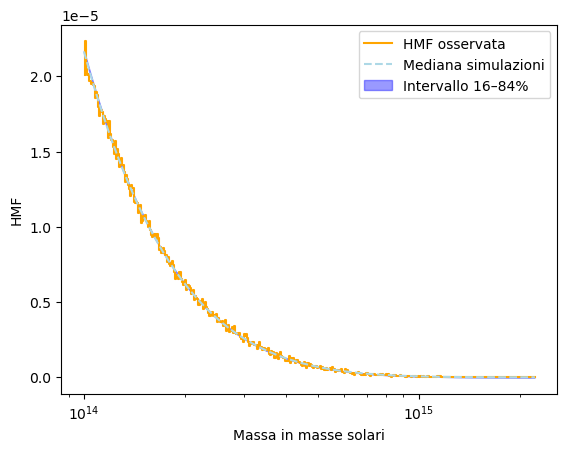

In [45]:
Nsamples = len(flat_samples1) // 100   # numero di simulazioni = blocchi da 100
Mmax = np.max(centri_bins1)
Marr = np.logspace(14, np.log10(Mmax), 1000)
Narr = np.zeros((1000, Nsamples))

# Ciclo sui blocchi da 100
for i in range(Nsamples):
    # estraggo una coppia casuale dal blocco corrente
    start = i * 100
    end = start + 100
    p = flat_samples1[np.random.randint(start, end), :]

    params_new = {'flat': True,'H0': 67.77,'Om0': p[1],'Ob0': 0.049,'sigma8': p[0],'ns': 0.96}
    cosmology.addCosmology('myCosmo_new', params_new)
    cosmo_new = cosmology.setCosmology('myCosmo_new')

    # una simulazione per questo blocco
    Narr[:, i] = mass_function.massFunction(Marr, z1, mdef="vir", model="despali16", q_out="dndlnM")

# Plot
plt.step(centri_bins1, mfunc_oss1, where="mid", color="orange", label="HMF osservata")
plt.plot(Marr, np.percentile(Narr, 50, axis=1), ls="--", color="lightblue", label="Mediana simulazioni")
plt.fill_between(Marr, np.percentile(Narr, 16, axis=1), np.percentile(Narr, 84, axis=1),
                 alpha=0.4, color="blue", label="Intervallo 16–84%")

plt.xscale("log")
plt.xlabel("Massa in masse solari")
plt.ylabel("HMF")
plt.legend()
plt.show()


Purtroppo non si riesce ad apprezzare l'intervallo tra 16 percentile e 84 percentile. Sembra che tutte le simulazioni (dove viene stimata la HMF con i parametri estratti casualmente dalle catene) fittino i dati allo stesso modo.

**VERIFICA BONTà DEL FIT**

Per verificare la **bontà del modello**, è possibile confrontare l’HMF osservata con due diverse previsioni teoriche:
1. quella ottenuta utilizzando il **modello di best-fit**, cioè i parametri che massimizzano la funzione di verosimiglianza;
2. quella calcolata impiegando i **valori medi posteriori dei parametri**.

In questo modo, invece di fornire alla Halo Mass Function i valori attesi a priori, si utilizzano direttamente i parametri stimati dall’analisi dei dati. 

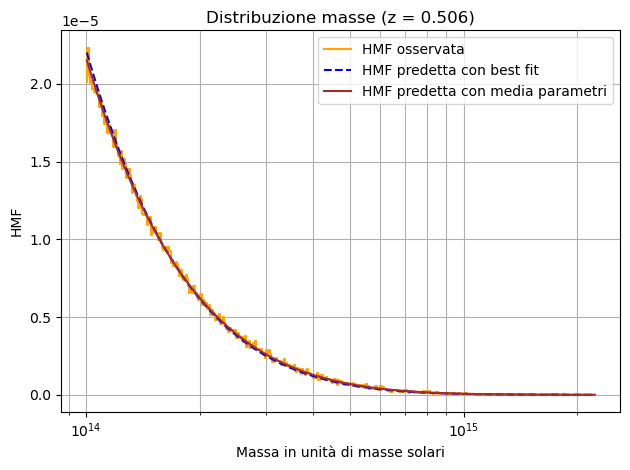

In [46]:
#COSMO CON PARAMETRI BEST FIT
params_new_best = {'flat': True, 'H0': 67.77, 'Om0': 0.332872, 'Ob0': 0.049, 
'sigma8': 0.803974, 'ns': 0.96} 
#Registro nuovo modello cosmologico con i parametri sopra definiti
cosmology.addCosmology('myCosmo_new_best', params_new_best)
#Attivare moil modello cosmologico appena creato come cosmologia corrente
#Tutte le funzioni di colossus useranno questi parametri
cosmo_new_best = cosmology.setCosmology('myCosmo_new_best')
#Scriviamo HMF predetta, ottenuta con i parametri cosmologici fissati
mfunc1_new_best = mass_function.massFunction(centri_bins1, z1, mdef = "vir", model = "despali16", q_out = "dndlnM" )

#COSMO CON MEDIA PARAMETRI STIMATI DALLE CATENE
params_new_mean = {'flat': True, 'H0': 67.77, 'Om0': 0.313784, 'Ob0': 0.049, 
'sigma8': 0.823208, 'ns': 0.96} 
#Registro nuovo modello cosmologico con i parametri sopra definiti
cosmology.addCosmology('myCosmo', params_new_mean)
#Attivare moil modello cosmologico appena creato come cosmologia corrente
#Tutte le funzioni di colossus useranno questi parametri
cosmo_new_mean = cosmology.setCosmology('myCosmo')
#Scriviamo HMF predetta, ottenuta con i parametri cosmologici fissati
mfunc1_new_mean = mass_function.massFunction(centri_bins1, z1, mdef = "vir", model = "despali16", q_out = "dndlnM" )

#Scriviamo HMF osservata
dlnM1 = np.diff( np.log(mass_bins1) ) #calcolo la differenza tra i logaritmi delle masse (già ottenuti nella sezione 1.3)
mfunc_oss1 = conteggi_bins1/( vol1*dlnM1 )
plt.figure()
plt.step(centri_bins1, mfunc_oss1, where="mid", color="orange", label = "HMF osservata" )
plt.plot(centri_bins1, mfunc1_new_best, ls = "--", label = "HMF predetta con best fit", color = "blue" )
plt.plot(centri_bins1, mfunc1_new_mean, ls = "-", label = "HMF predetta con media parametri", color = "brown" )
plt.xscale( "log" )
plt.xlabel( "Massa in unità di masse solari" )
plt.ylabel( "HMF" )
plt.title( f"Distribuzione masse (z = {z1})" )
plt.grid( True, which="both", ls = "-" )
plt.legend()
plt.tight_layout()
plt.show()


In [47]:
mu1_new_best = mfunc1_new_best * vol1 * dlnM1
sigma1 = np.sqrt(np.maximum(conteggi_bins1, 1))  # errore Poisson, se ho conteggi <1 (che darebbero problemi) pongo 1
chi2_1 = np.sum(((conteggi_bins1 - mu1_new_best) / sigma1) ** 2)
chi2_red_1 = chi2_1 / (len(conteggi_bins1) - 2)  # p=2 parametri liberi
print(f"Chi2 = {chi2_1:.2f}, Chi2 ridotto = {chi2_red_1:.2f}")

Chi2 = 566.62, Chi2 ridotto = 1.39


In [48]:
mu1_new_mean = mfunc1_new_mean * vol1 * dlnM1
sigma1 = np.sqrt(np.maximum(conteggi_bins1, 1))  # errore Poisson, se ho conteggi <1 (che darebbero problemi) pongo 1
chi2_1 = np.sum(((conteggi_bins1 - mu1_new_mean) / sigma1) ** 2)
chi2_red_1 = chi2_1 / (len(conteggi_bins1) - 2)  # p=2 parametri liberi
print(f"Chi2 = {chi2_1:.2f}, Chi2 ridotto = {chi2_red_1:.2f}")

Chi2 = 520.88, Chi2 ridotto = 1.28


Si può notare come il test del $\chi^2$ migliori notevolmente sia utilizzando i parametri di best fit, che utilizzando il valore medio. Questo risultato è ragionevole dal momento che questi parametri sono stati trovati proprio studiando la dustribuzione dei dati.

**STUDIO LA CORRELAZIONE TRA I PARAMETRI**

Si potrebbe andare a studiare la matrice di correlazione tra i parametri $\sigma_8$ e $\Omega_m$.

Il **coefficiente di correlazione** tra i due parametri è dato da: $$r = \frac{\mathrm{Cov}(\sigma_8,\Omega_m)}{\sqrt{\mathrm{Var}(\sigma_8)\,\mathrm{Var}(\Omega_m)}}$$
Per collegare il coefficiente di correlazione con l'angolo (o pendenza) dell'asse maggiore della nube di dati, è necessario considerare la varianza di ciascun parametro. Questa relazione è legata alla matrice di covarianza dei dati.<br>
L'orientamento dell'asse maggiore della nube di dati è determinato dall'autovettore corrispondente al più grande autovalore della **matrice di covarianza**: $$\Sigma = \begin{pmatrix} \mathrm{Var}(\sigma_8) & \mathrm{Cov}(\sigma_8,\Omega_m) \\
\mathrm{Cov}(\sigma_8,\Omega_m) & \mathrm{Var}(\Omega_m)\end{pmatrix}$$
Gli autovalori e autovettori si ottengono risolvendo: $$\Sigma \, v_i = \lambda_i \, v_i$$
dove $\lambda_i$ è un autovalore e $v_i$ è il corrispondente autovettore.  
L'autovettore associato al più grande autovalore punta nella direzione dell'asse maggiore.<br>
La **pendenza $m$ dell'asse maggiore** può essere espressa come: $$m = \frac{v_{\Omega_m}}{v_{\sigma_8}}$$
dove $v = (v_{\sigma_8}, v_{\Omega_m})$ è l'autovettore corrispondente al massimo autovalore.

In particolare uno potrebbe capire qual'è la direzione di degenerazione e legare coefficiente di correlazione con la pendenza dell'ellissi.

Correlation Matrix (sigma8 vs Omega_m, z1):
[[ 1.   -0.96]
 [-0.96  1.  ]]
Pendenza asse maggiore (z1): -0.9761857985841925


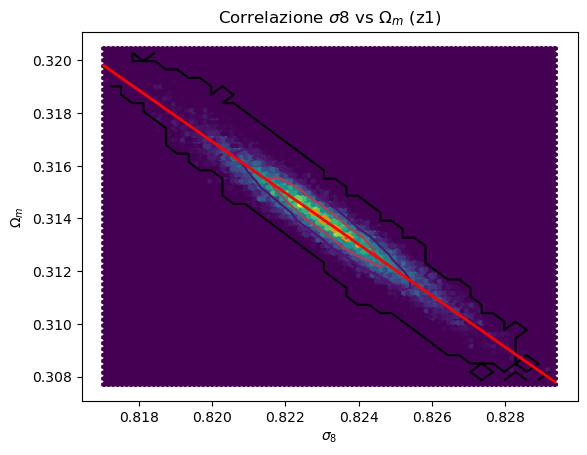

In [49]:
# Abbiamo: colonna 0 = sigma8, colonna 1 = Omega_m
sigma8_z1 = flat_samples1[:, 0]
Om0_z1    = flat_samples1[:, 1]

# Matrice di correlazione
#corr = np.corrcoef(np.vstack((sigma8_z1, Om0_z1)))
corr =np.corrcoef(flat_samples1.T)
print("Correlation Matrix (sigma8 vs Omega_m, z1):")
print(np.round(corr, 2))

# Disegna un istogramma 2D su griglia esagonale.
hist=plt.hexbin(sigma8_z1, Om0_z1) 

# Istogramma 2D
hist, xedges, yedges = np.histogram2d(sigma8_z1, Om0_z1, bins=40)

# Meshgrid per i contorni
# Costruzione griglia centri dei bin
X, Y = np.meshgrid(
    0.5 * (xedges[:-1] + xedges[1:]),
    0.5 * (yedges[:-1] + yedges[1:])
)

# Contour plot
# Otteniamo le curve di livello che indicano una regione con stesso conteggio
plt.contour(X, Y, hist, levels=3, cmap='inferno') #3 curve di livello
plt.xlabel(r"$\sigma_8$")
plt.ylabel(r"$\Omega_m$")
plt.title(r"Correlazione $\sigma8$ vs $\Omega_m$ (z1)")

# Matrice di covarianza
cov_matrix = np.cov(sigma8_z1, Om0_z1)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Direzione principale
major_axis = eigenvectors[:, np.argmax(eigenvalues)]
slope = major_axis[1] / major_axis[0]
print("Pendenza asse maggiore (z1):", slope)

# Fit lineare lungo l’asse principale
oms = np.linspace(min(sigma8_z1), max(sigma8_z1), 50)
plt.plot(oms, slope*(oms - np.mean(sigma8_z1)) + np.mean(Om0_z1), 'r-', lw=2)

plt.show()


## 4. INFERENZA BAYESIANA considerando la CURVATURA dell'UNIVERSO

### 4.1 INTRODUZIONE TEORICA

Possiamo espandere ora l'analisi statistica effettauta nella sezione 3, a modelli cosmologici in cui la geometria dell'universo non è necessariamente piatta. In questi modelli oltre ai parametri precedentemente osservati, vogliamo studiare anche la distribuzione della **densità di energia oscura $\Omega_\Lambda$**. <br>
La densità di energia oscura gioca un ruolo chiave nel spiegare l'espansione accelerata dell'universo, dedotta da osservazioni cosmologiche. <br>
Un universo piatto (flat) implica che la somma delle densità di materia ($\Omega_m$), radiazione (che possiamo considerare trascurabile al giorno d'oggi) e quella dell'energia oscura sia uguale a 1. <br>

In un modello non piatto, possimo definire quindi la **densità associata alla curvatura**: $$\Omega_k=1-\Omega_m-\Omega_\Lambda$$
In base al valore di $\Omega_k$ ho una geometria diversa:
* se $\Omega_k=0$ ho un universo piatto
* se $\Omega_k>0$ ho un universo aperto
* se $\Omega_k<0$ ho un universo chiuso

Per analizzare scenari non piatti è necessario modificare il dizionario dei parametri cosmologici nel modo seguente: 

dove abbiamo specificato che l'universo non è necessariamente piatto e che ho il parametro extra relativo alla densità di energia oscura.

In questo caso si assume di conoscere a priori, grazie ad esperimenti effettuati in precedenza, che il parametro $\Omega_\Lambda$ segua una distribuzione gaussiana con media pari a 0.7 e deviazione standard pari a 0.05.

Dovremo quindi modificare la "def" del **logaritmo della prior** relativo al codice precedente (sezione 3.3) in questo modo: 
$$\ln{P(p|M)}=-\frac{1}{2}\frac{(\Omega_\Lambda-0.7)^2}{0.05^2}-\ln{0.05\sqrt{2\pi}} \qquad \text{con} \qquad 0.1\leq\sigma_8, \Omega_m\leq1.1$$

Andremo quindi ad espandere l’inferenza bayesiana includendo la curvatura, utilizzando i vincoli gaussiani su $\Omega_\Lambda$, e calcolare quali limiti si ottengono per il parametro di curvatura $\Omega_k$.

### 4.1 HMF in un MODELLO COSMOLOGICO NON PIATTO

Prima di effettuare un'analisi bayesiana relativa ai 3 parametri cosmologici e studiare i vincoli relativi a $\Omega_k$, andiamo ad analizzare l'HMF utilizzando un modello cosmologico curvo.

In [15]:
#Dizionario parametri
params_k = {'flat': False, 'H0': 67.77, 'Ode0': 0.69, 'Om0': 0.31, 'Ob0': 0.048254, 'sigma8': 0.81, 'ns': 0.96}
#Registro nuovo modello cosmologico con i parametri sopra definiti
cosmology.addCosmology('myCosmok', params_k)
#Attivare moil modello cosmologico appena creato come cosmologia corrente
#Tutte le funzioni di colossus useranno questi parametri
cosmok = cosmology.setCosmology('myCosmok')

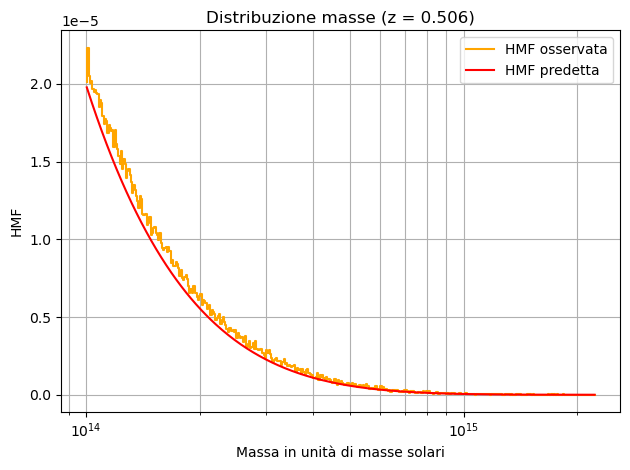

In [16]:
#Scriviamo HMF predetta, ottenuta con i parametri cosmologici fissati
mfunc1_k = mass_function.massFunction(centri_bins1, z1, mdef = "vir", model = "despali16", q_out = "dndlnM" )

#Scriviamo HMF osservata
dlnM1 = np.diff( np.log(mass_bins1) ) #calcolo la differenza tra i logaritmi delle masse (già ottenuti nella sezione 1.3)
mfunc_oss1 = conteggi_bins1/( vol1*dlnM1 )

plt.figure()
plt.step(centri_bins1, mfunc_oss1, where="mid", color="orange", label = "HMF osservata" )
plt.plot(centri_bins1, mfunc1_k, label = "HMF predetta", color = "red" )
plt.xscale( "log" )
plt.xlabel( "Massa in unità di masse solari" )
plt.ylabel( "HMF" )
plt.title( f"Distribuzione masse (z = {z1})" )
plt.grid( True, which="both", ls = "-" )
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
mu1 = mfunc1_k * vol1 * dlnM1
sigma1 = np.sqrt(np.maximum(conteggi_bins1, 1))  # errore Poisson, se ho conteggi <1 (che darebbero problemi) pongo 1
chi2_1 = np.sum(((conteggi_bins1 - mu1) / sigma1) ** 2)
chi2_red_1 = chi2_1 / (len(conteggi_bins1) - 0)  # p=0 parametri liberi
print(f"Chi2 = {chi2_1:.2f}, Chi2 ridotto = {chi2_red_1:.2f}")

Chi2 = 2109.40, Chi2 ridotto = 5.14


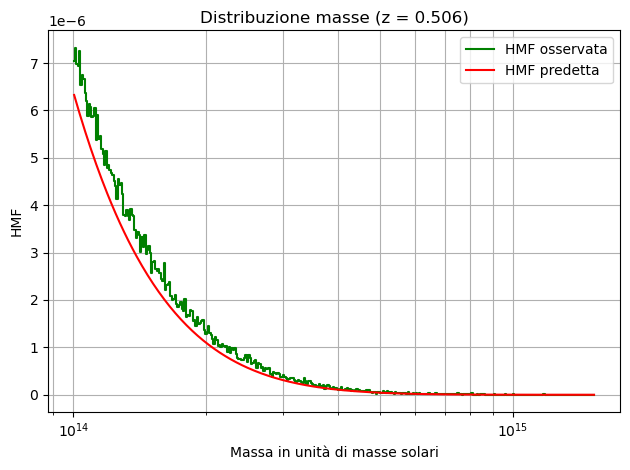

In [18]:
#Scriviamo HMF predetta, ottenuta con i parametri cosmologici fissati
mfunc2_k = mass_function.massFunction(centri_bins2, z2, mdef = "vir", model = "despali16", q_out = "dndlnM" )

#Scriviamo HMF osservata
dlnM2 = np.diff( np.log(mass_bins2) ) #calcolo la differenza tra i logaritmi delle masse (già ottenuti nella sezione 1.3)
mfunc_oss2 = conteggi_bins2/( vol2*dlnM2 )

plt.figure()
plt.step(centri_bins2, mfunc_oss2, where="mid", color="green", label = "HMF osservata" )
plt.plot(centri_bins2, mfunc2_k, label = "HMF predetta", color = "red" )
plt.xscale( "log" )
plt.xlabel( "Massa in unità di masse solari" )
plt.ylabel( "HMF" )
plt.title( f"Distribuzione masse (z = {z1})" )
plt.grid( True, which="both", ls = "-" )
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
mu2 = mfunc2_k * vol2 * dlnM2
sigma2 = np.sqrt(np.maximum(conteggi_bins2, 1))  # errore Poisson, se ho conteggi <1 (che darebbero problemi) pongo 1
chi2_2 = np.sum(((conteggi_bins2 - mu2) / sigma2) ** 2)
chi2_red_2 = chi2_2 / (len(conteggi_bins2) - 0)  # p=0 parametri liberi
print(f"Chi2 = {chi2_2:.2f}, Chi2 ridotto = {chi2_red_2:.2f}")

Chi2 = 4030.40, Chi2 ridotto = 10.72


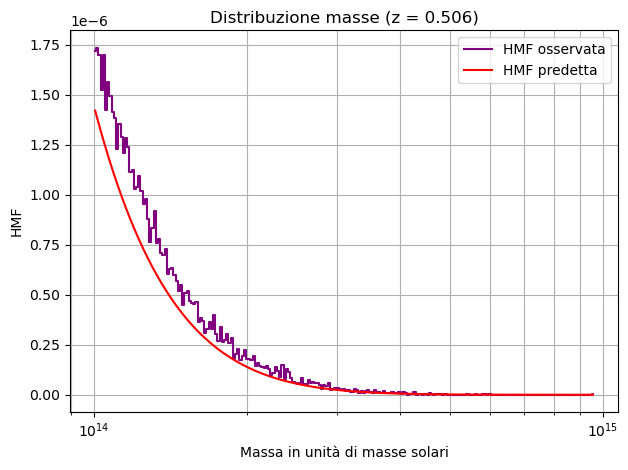

In [20]:
#Scriviamo HMF predetta, ottenuta con i parametri cosmologici fissati
mfunc3_k = mass_function.massFunction(centri_bins3, z3, mdef = "vir", model = "despali16", q_out = "dndlnM" )

#Scriviamo HMF osservata
dlnM3 = np.diff( np.log(mass_bins3) ) #calcolo la differenza tra i logaritmi delle masse (già ottenuti nella sezione 1.3)
mfunc_oss3 = conteggi_bins3/( vol3*dlnM3 )

plt.figure()
plt.step(centri_bins3, mfunc_oss3, where="mid", color="purple", label = "HMF osservata" )
plt.plot(centri_bins3, mfunc3_k, label = "HMF predetta", color = "red" )
plt.xscale( "log" )
plt.xlabel( "Massa in unità di masse solari" )
plt.ylabel( "HMF" )
plt.title( f"Distribuzione masse (z = {z1})" )
plt.grid( True, which="both", ls = "-" )
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
mu3 = mfunc3_k * vol3 * dlnM3
sigma3 = np.sqrt(np.maximum(conteggi_bins3, 1))  # errore Poisson, se ho conteggi <1 (che darebbero problemi) pongo 1
chi2_3 = np.sum(((conteggi_bins3 - mu3) / sigma3) ** 2)
chi2_red_3 = chi2_3 / (len(conteggi_bins3) - 0)  # p=0 parametri liberi
print(f"Chi2 = {chi2_3:.2f}, Chi2 ridotto = {chi2_red_3:.2f}")

Chi2 = 3003.04, Chi2 ridotto = 13.23


Con un modello di universo curvo e utilizzando i parametri suggeriti dalla consegna, non ottengo delle funzioni di fit molto diverse dalle precedenti. Tuttavia si può norare come il $\chi^2$ sia leggermente peggiorato in tutti e 3 i casi.

### 4.2 DISTRIBUZIONE STATISTICA dei PARAMETRI $\sigma_8$, $\Omega_m$ e $\Omega_\Lambda$

Andiamo a definire i logaritmi delle **funzioni prior, Likelihood e posterir**.

In [21]:
def log_prior_k(p): #distribuzione della prior
    sigma8, Om0, Ode0 = p #array che contiene i parametri cosmologici che voglio stimare
    if 0.1<=sigma8<=1.1 and 0.1<=Om0<=1.1 and Ode0>0:
        return -0.5*(((Ode0-0.7)/0.05)**2)-np.log(0.05*np.sqrt(2*np.pi))
    return -np.inf #punto a probabilità 0

def log_likelihood_k(p, Noss, centri_bins, z, vol, dlnM): #i dati sono le altezze e i relativi errori
    sigma8, Om0, Ode0 = p
    params = {'flat': False, 'H0': 67.77, 'Ode0': Ode0, 'Om0': Om0, 'Ob0': 0.048254, 'sigma8': sigma8, 'ns': 0.96}
    cosmology.addCosmology('myCosmo', params)
    cosmo = cosmology.setCosmology('myCosmo')
    mfunc = mass_function.massFunction(centri_bins, z, mdef = "vir", model = "despali16", q_out = "dndlnM" )
    #Valore atteso conteggi
    mu = mfunc * vol * dlnM
    # Controllo validità (evito log di valori <=0)
    if not np.all(mu > 0):
        return -np.inf
    #Calcolo log likelihood
    logL = np.sum(Noss * np.log(mu) - mu)
    return logL 

def log_posterior_k(p, Noss, centri_bins, z, vol, dlnM):
    logPr = log_prior_k(p)
    if not np.isfinite(logPr):
        return -np.inf
    #Calcolo la posterior
    logPost = logPr + log_likelihood_k(p, Noss, centri_bins, z, vol, dlnM)
    return logPost

# Definizione della funzione da minimizzare (negativa della log-posterior)
nll_k = lambda *args: -log_posterior_k(*args)

Nella definizione della distribuzione a priori ho introdotto una condizione sul parametro $\Omega_\Lambda$, poiché durante l’algoritmo di minimizzazione veniva segnalato un errore. Per evitare tale problema, ho imposto il vincolo $\Omega_\Lambda>0$.

Stimiamo i **parametri di best fit**:

In [25]:
# Fisso il seed per riproducibilità
np.random.seed(42)

# Punto iniziale per i parametri [sigma8, Om0, Ode0]
initial1_k = np.array([0.8, 0.3, 0.7]) * (1 + 0.01 * np.random.randn(3))

# Ottimizzazione: args contiene i dati osservati e parametri del caso z1
args1=(conteggi_bins1, centri_bins1, z1, vol1, dlnM1)
soln1_k = minimize(nll_k, initial1_k, args1)

# Parametri ottimali
sigma8_bf1_k, Om0_bf1_k, Ode0_bf1_k  = soln1_k.x
print("Best fit con z1 di sigma8, Om0, Ode0:", soln1_k.x)

# Fisso il seed per riproducibilità
np.random.seed(42)

# Punto iniziale per i parametri [sigma8, Om0, Ode0]
initial2_k = np.array([0.8, 0.3, 0.7]) * (1 + 0.01 * np.random.randn(3))

# Ottimizzazione: args contiene i dati osservati e parametri del caso z2
args2=(conteggi_bins2, centri_bins2, z2, vol2, dlnM2)
soln2_k = minimize(nll_k, initial2_k, args2)

# Parametri ottimali
sigma8_bf2_k, Om0_bf2_k, Ode0_bf2_k = soln2_k.x
print("Best fit con z2 di sigma8, Om0, Ode0:", soln2_k.x)

# Fisso il seed per riproducibilità
np.random.seed(42)

# Punto iniziale per i parametri [sigma8, Om0, Ode0]
initial3_k = np.array([0.8, 0.3, 0.7]) * (1 + 0.01 * np.random.randn(3))

# Ottimizzazione: args contiene i dati osservati e parametri del caso z3
args3=(conteggi_bins3, centri_bins3, z3, vol3, dlnM3)
soln3_k = minimize(nll_k, initial3_k, args3)

# Parametri ottimali
sigma8_bf3_k, Om0_bf3_k, Ode0_bf3_k = soln3_k.x
print("Best fit con z3 di sigma8, Om0, Ode0:", soln3_k.x)

C:\Users\dmreb\anaconda3\envs\SCRIPTPYTHON\Lib\site-packages\scipy\optimize\_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\dmreb\anaconda3\envs\SCRIPTPYTHON\Lib\site-packages\scipy\optimize\_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\dmreb\anaconda3\envs\SCRIPTPYTHON\Lib\site-packages\scipy\optimize\_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\dmreb\anaconda3\envs\SCRIPTPYTHON\Lib\site-packages\scipy\optimize\_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\dmreb\anaconda3\envs\SCRIPTPYTHON\Lib\site-packages\scipy\optimize\_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\dmreb\anaconda3\envs\SCRIPTPYTHON\Lib\site-packages\scipy\optimize\_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Best fit con z1 di sigma8, Om0, Ode0: [0.80397371 0.35478459 0.70453333]
Best fit con z2 di sigma8, Om0, Ode0: [0.80397371 0.41400316 0.70453317]
Best fit con z3 di sigma8, Om0, Ode0: [0.80397371 0.49838078 0.70453198]


Anche in questo caso, per eliminare tali errori sarebbe opportuno imporre dei limiti sui parametri ed escludere, nell’algoritmo di minimizzazione, quelli che non rientrano in tali vincoli. Si noti tuttavia che, in questo contesto, l’errore può essere ignorato: i parametri ottenuti risultano infatti coerenti con le aspettative e rispettano i limiti imposti.

**Campioniamo i parametri** $\sigma_8$, $\Omega_m$ e $\Omega_\Lambda$ e grafichiamo le **catene** sovrapposte (nei 3 casi relativi ai 3 bin di redshift). Anche in questo caso si è scelto di utilizzare un numero di walkers pari a 20, poiché aumentarne ulteriormente il valore avrebbe comportato un tempo di calcolo maggiore per la costruzione delle catene. Il numero di step è stato fissato a 2500.

In [26]:
#Parto da una posizione casuale, con 20 walkers per 3 parametri
pos1_k = soln1_k.x *(1+ 1e-2 * np.random.randn(20, 3))
nwalkers1_k, ndim1_k = pos1_k.shape
#Campionatore
sampler1_k = emcee.EnsembleSampler(nwalkers1_k, ndim1_k, log_posterior_k, args=args1)
#Simulazione MCMC per campionare i parametri
sampler1_k.run_mcmc(pos1_k, 2500, progress=True)

100%|██████████| 2500/2500 [23:44<00:00,  1.76it/s]


State([[0.82286524 0.31616026 0.68866979]
 [0.82520475 0.31196833 0.67270915]
 [0.82861855 0.31027732 0.67693549]
 [0.82701733 0.31275925 0.70838058]
 [0.83005383 0.31127781 0.71169333]
 [0.82898654 0.31221922 0.71067248]
 [0.82563506 0.31379837 0.68427033]
 [0.83379399 0.31103136 0.76442985]
 [0.82314373 0.31532526 0.67498988]
 [0.82411077 0.31529292 0.69505802]
 [0.83493095 0.31272721 0.81715502]
 [0.8278883  0.31157027 0.7088772 ]
 [0.82906325 0.31054144 0.69211212]
 [0.82760097 0.31223013 0.69762385]
 [0.82422557 0.31670076 0.70338177]
 [0.82673215 0.31388988 0.70791276]
 [0.82960797 0.31130068 0.70989055]
 [0.83230202 0.31209859 0.77352118]
 [0.82756233 0.31412003 0.71665298]
 [0.82553362 0.31332892 0.68384254]], log_prob=[1002543.03990494 1002542.41411517 1002542.45419633 1002544.04365005
 1002542.73789408 1002543.67404494 1002544.36495371 1002541.53324367
 1002544.09268582 1002543.95295817 1002542.28115175 1002542.56334722
 1002543.43392692 1002544.84632415 1002542.02523624 1002

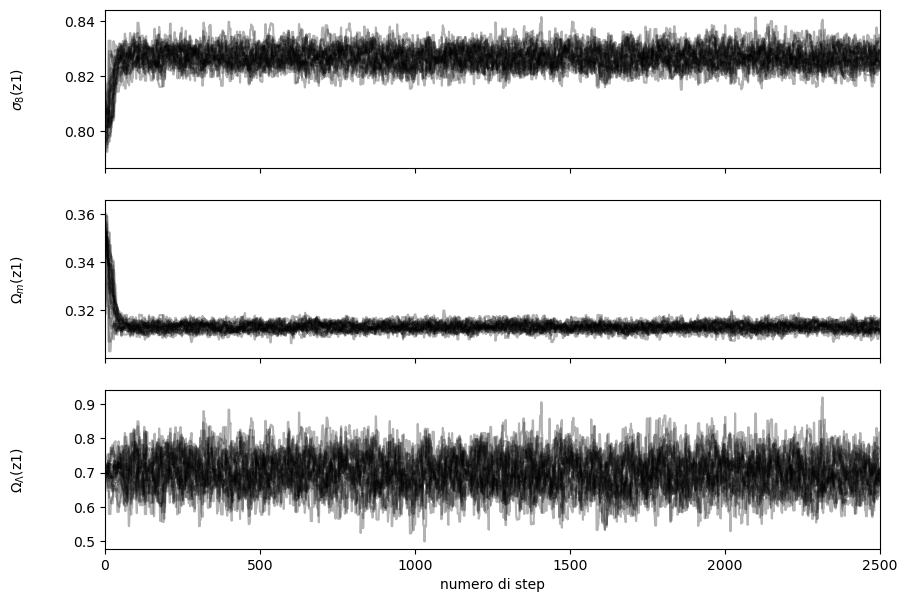

In [27]:
#Grafico che mostra l'evoluzione delle catene per i 3 parametri
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples1_k = sampler1_k.get_chain() #Ottengo i campioni generati dal campionatore sampler1
labels1_k = [r"$\sigma_8$(z1)", r"$\Omega_m$(z1)", r"$\Omega_\Lambda$(z1)"]
for i in range(ndim1_k):
    ax = axes[i]
    ax.plot(samples1_k[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples1_k))
    ax.set_ylabel(labels1_k[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("numero di step");
plt.show()

In [28]:
nstep1_k, nwalkers1_k, ndim1_k = samples1_k.shape
records1_k = []
for w in range(nwalkers1_k):
    for i in range(nstep1_k):
        records1_k.append([i, w, samples1_k[i, w, 0], samples1_k[i, w, 1], samples1_k[i, w, 2]])

df1_k = pd.DataFrame(records1_k, columns=["step", "walker", "sigma8", "Om0", "Ode0"])
df1_k.to_csv("samples1_with_walkers_k.csv", index=False)

(42000, 3)


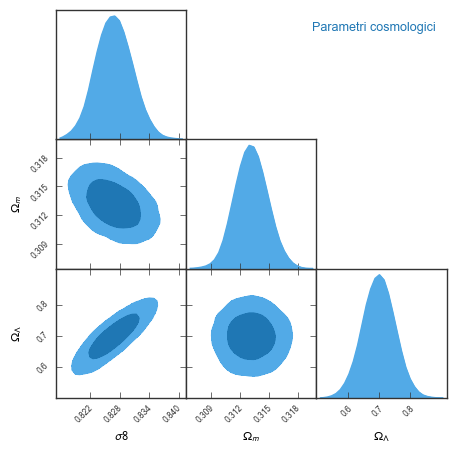

In [29]:
import pygtc #libreria che fa le distribuzioni marginali

#Conto i campioni totali da utilizzare per la distribuzione posterior
flat_samples1_k = sampler1_k.get_chain(discard=400, flat=True) 
print(flat_samples1_k.shape)
#Distribuzioni
GTC = pygtc.plotGTC(chains=flat_samples1_k, #passa campioni fusi (tutti insieme di tutti i walker) alla funzione
                    paramNames=[r'$\sigma8$',r'$\Omega_m$',r'$\Omega_\Lambda$'],
                    chainLabels=['Parametri cosmologici'],
                    figureSize='MNRAS_page')
plt.show()

In [30]:
media1_k = np.mean(flat_samples1_k, axis=0)
var1_k = np.var(flat_samples1_k, axis=0)
rho1_k01 = np.corrcoef(flat_samples1_k[:,0], flat_samples1_k[:,1])[0,1]
rho1_k02 = np.corrcoef(flat_samples1_k[:,0], flat_samples1_k[:,2])[0,1]
rho1_k12 = np.corrcoef(flat_samples1_k[:,1], flat_samples1_k[:,2])[0,1]

print("media parametri [sigma8, Om0, Ode0] (z1):", media1_k)
print("varianza parametri [sigma8, Om0, Ode0] (z1):", var1_k)


print("Coefficiente correlazione tra sigma8 e Om0", rho1_k01)
print("Coefficiente correlazione tra sigma8 e Ode0", rho1_k02)
print("Coefficiente correlazione tra Om0 e Ode0", rho1_k12)

media parametri [sigma8, Om0, Ode0] (z1): [0.82681232 0.31313734 0.69932164]
varianza parametri [sigma8, Om0, Ode0] (z1): [1.29819143e-05 2.71137593e-06 2.56295228e-03]
Coefficiente correlazione tra sigma8 e Om0 -0.43509660891228163
Coefficiente correlazione tra sigma8 e Ode0 0.8939762564178622
Coefficiente correlazione tra Om0 e Ode0 -0.005950716325640592


In [37]:
#Parto da una posizione casuale, con 20 walkers per 3 parametri
pos2_k = soln2_k.x *(1+ 1e-2 * np.random.randn(20, 3))
nwalkers2_k, ndim2_k = pos2_k.shape
#Campionatore
sampler2_k = emcee.EnsembleSampler(nwalkers2_k, ndim2_k, log_posterior_k, args=args2)
#Simulazione MCMC per campionare i parametri
sampler2_k.run_mcmc(pos2_k, 2500, progress=True)

100%|██████████| 2500/2500 [14:49<00:00,  2.81it/s]


State([[0.82428789 0.31286762 0.66511629]
 [0.83119723 0.3078085  0.69604897]
 [0.82869259 0.31341051 0.69475606]
 [0.82805189 0.30779946 0.67474377]
 [0.83541809 0.31226501 0.7271387 ]
 [0.84324257 0.30832146 0.76100193]
 [0.82854225 0.30810881 0.67821958]
 [0.84031212 0.31114582 0.75249151]
 [0.82945364 0.31118963 0.69315781]
 [0.83201854 0.30957252 0.70675789]
 [0.82987487 0.31354222 0.70093404]
 [0.826416   0.31073863 0.67421259]
 [0.81964331 0.30987135 0.62979977]
 [0.83297504 0.31191107 0.71263802]
 [0.8262444  0.30837795 0.6658491 ]
 [0.83936263 0.308242   0.74215289]
 [0.81957407 0.31147493 0.63133991]
 [0.84741496 0.31158557 0.79333283]
 [0.81827878 0.30970284 0.61792192]
 [0.84446132 0.30915385 0.77418249]], log_prob=[848106.40337973 848106.03770328 848106.24045652 848106.81933371
 848105.48906846 848105.5472862  848107.00673226 848106.21653562
 848107.35960966 848105.66991349 848106.19733597 848107.12659502
 848105.92917736 848106.18217405 848106.90786899 848106.78950416
 84

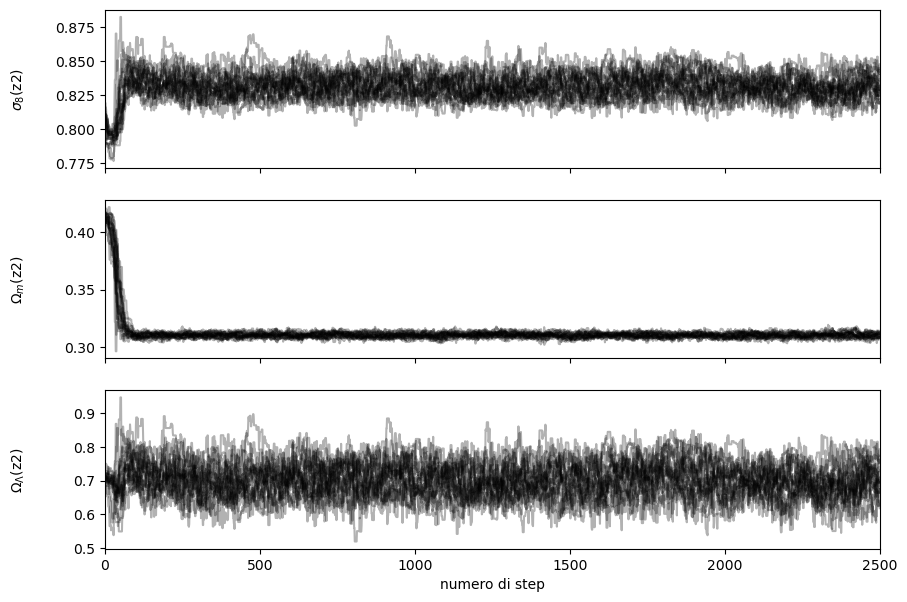

In [38]:
#Grafico che mostra l'evoluzione delle catene per i 3 parametri
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples2_k = sampler2_k.get_chain() #Ottengo i campioni generati dal campionatore sampler1
labels2_k = [r"$\sigma_8$(z2)", r"$\Omega_m$(z2)", r"$\Omega_\Lambda$(z2)"]
for i in range(ndim2_k):
    ax = axes[i]
    ax.plot(samples2_k[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples2_k))
    ax.set_ylabel(labels2_k[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("numero di step");
plt.show()

In [39]:
nstep2_k, nwalkers2_k, ndim2_k = samples2_k.shape
records2_k = []
for w in range(nwalkers2_k):
    for i in range(nstep2_k):
        records2_k.append([i, w, samples2_k[i, w, 0], samples2_k[i, w, 1], samples2_k[i, w, 2]])

df2_k = pd.DataFrame(records2_k, columns=["step", "walker", "sigma8", "Om0", "Ode0"])
df2_k.to_csv("samples2_with_walkers_k.csv", index=False)

(42000, 3)


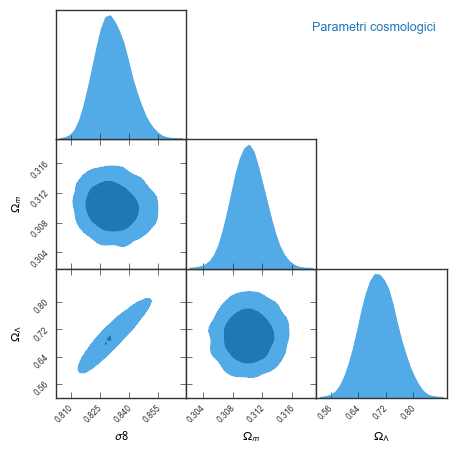

In [40]:
import pygtc #libreria che fa le distribuzioni marginali

#Conto i campioni totali da utilizzare per la distribuzione posterior
flat_samples2_k = sampler2_k.get_chain(discard=400, flat=True) 
print(flat_samples2_k.shape)
#Distribuzioni
GTC = pygtc.plotGTC(chains=flat_samples2_k, #passa campioni fusi (tutti insieme di tutti i walker) alla funzione
                    paramNames=[r'$\sigma8$',r'$\Omega_m$',r'$\Omega_\Lambda$'],
                    chainLabels=['Parametri cosmologici'],
                    figureSize='MNRAS_page')
plt.show()

In [41]:
media2_k = np.mean(flat_samples2_k, axis=0)
var2_k = np.var(flat_samples2_k, axis=0)
rho2_k01 = np.corrcoef(flat_samples2_k[:,0], flat_samples2_k[:,1])[0,1]
rho2_k02 = np.corrcoef(flat_samples2_k[:,0], flat_samples2_k[:,2])[0,1]
rho2_k12 = np.corrcoef(flat_samples2_k[:,1], flat_samples2_k[:,2])[0,1]

print("media parametri [sigma8, Om0, Ode0] (z2):", media2_k)
print("varianza parametri [sigma8, Om0, Ode0] (z2):", var2_k)


print("Coefficiente correlazione tra sigma8 e Om0", rho2_k01)
print("Coefficiente correlazione tra sigma8 e Ode0", rho2_k02)
print("Coefficiente correlazione tra Om0 e Ode0", rho2_k12)

media parametri [sigma8, Om0, Ode0] (z2): [0.83161719 0.31017753 0.70070362]
varianza parametri [sigma8, Om0, Ode0] (z2): [7.56964428e-05 4.50764718e-06 2.55947328e-03]
Coefficiente correlazione tra sigma8 e Om0 -0.10585263778103214
Coefficiente correlazione tra sigma8 e Ode0 0.9919469602015917
Coefficiente correlazione tra Om0 e Ode0 0.006651228973126128


In [31]:
#Parto da una posizione casuale, con 20 walkers per 3 parametri
pos3_k = soln3_k.x *(1+ 1e-2 * np.random.randn(20, 3))
nwalkers3_k, ndim3_k = pos3_k.shape
#Campionatore
sampler3_k = emcee.EnsembleSampler(nwalkers3_k, ndim3_k, log_posterior_k, args=args3)
#Simulazione MCMC per campionare i parametri
sampler3_k.run_mcmc(pos3_k, 2500, progress=True)

100%|██████████| 2500/2500 [2:39:24<00:00,  3.83s/it]  


State([[0.80244017 0.32785162 0.58680254]
 [0.84519775 0.32249791 0.75631288]
 [0.81547334 0.33254725 0.6485752 ]
 [0.84137036 0.32148732 0.73751587]
 [0.82618714 0.33007148 0.68895786]
 [0.8261199  0.32831641 0.68828647]
 [0.84312611 0.33028552 0.75271538]
 [0.81526585 0.33071824 0.64624142]
 [0.82897401 0.32134671 0.69564542]
 [0.80249502 0.32635407 0.58571151]
 [0.84026789 0.33395479 0.74626773]
 [0.81642812 0.33049664 0.64965853]
 [0.82459937 0.32734046 0.67980908]
 [0.8379446  0.33000468 0.73282413]
 [0.84037358 0.31831793 0.73192171]
 [0.83036734 0.32331671 0.69917945]
 [0.81886729 0.32876885 0.66152278]
 [0.83453469 0.32890611 0.72190371]
 [0.8260074  0.32878504 0.68577755]
 [0.83657738 0.32196039 0.72371025]], log_prob=[285906.00179045 285907.11930181 285907.02689233 285905.17537656
 285908.27898537 285908.66620693 285907.7765208  285907.60630899
 285907.60549445 285905.9919348  285905.97623549 285907.58103389
 285908.13746416 285907.8704189  285904.32855668 285907.80620134
 28

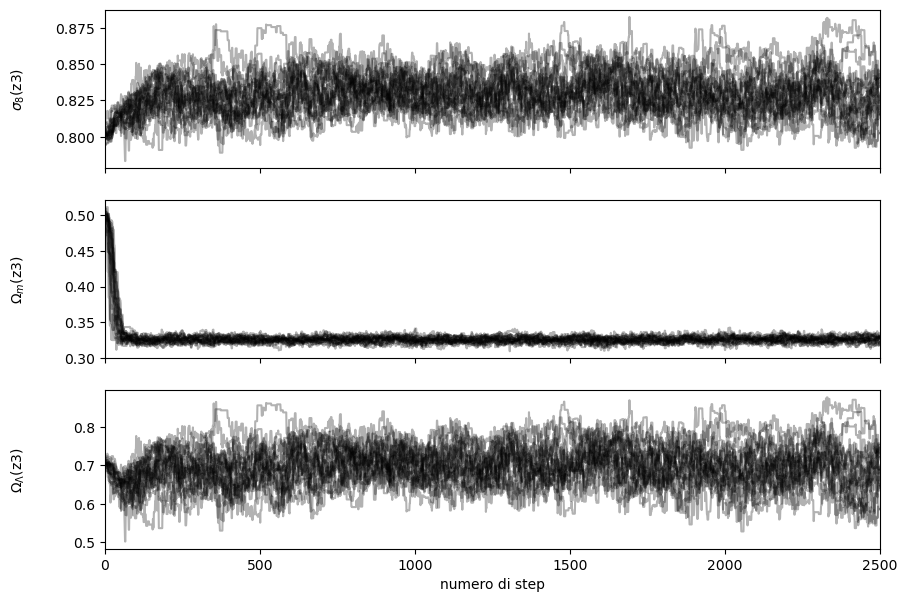

In [32]:
#Grafico che mostra l'evoluzione delle catene per i 3 parametri
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples3_k = sampler3_k.get_chain() #Ottengo i campioni generati dal campionatore sampler1
labels3_k = [r"$\sigma_8$(z3)", r"$\Omega_m$(z3)", r"$\Omega_\Lambda$(z3)"]
for i in range(ndim3_k):
    ax = axes[i]
    ax.plot(samples3_k[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples3_k))
    ax.set_ylabel(labels3_k[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("numero di step");
plt.show()

In [33]:
nstep3_k, nwalkers3_k, ndim3_k = samples3_k.shape
records3_k = []
for w in range(nwalkers3_k):
    for i in range(nstep3_k):
        records3_k.append([i, w, samples3_k[i, w, 0], samples3_k[i, w, 1], samples3_k[i, w, 2]])

df3_k = pd.DataFrame(records3_k, columns=["step", "walker", "sigma8", "Om0", "Ode0"])
df3_k.to_csv("samples3_with_walkers_k.csv", index=False)

(42000, 3)


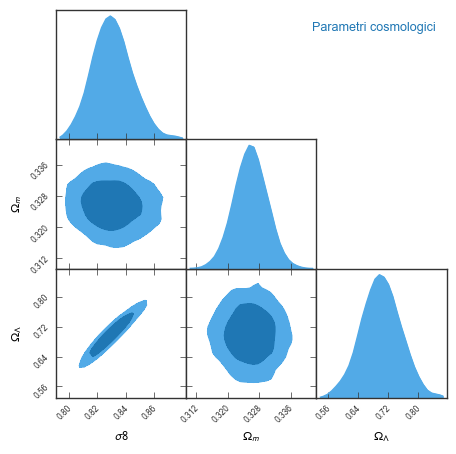

In [34]:
import pygtc #libreria che fa le distribuzioni marginali

#Conto i campioni totali da utilizzare per la distribuzione posterior
flat_samples3_k = sampler3_k.get_chain(discard=400, flat=True) 
print(flat_samples3_k.shape)
#Distribuzioni
GTC = pygtc.plotGTC(chains=flat_samples3_k, #passa campioni fusi (tutti insieme di tutti i walker) alla funzione
                    paramNames=[r'$\sigma8$',r'$\Omega_m$',r'$\Omega_\Lambda$'],
                    chainLabels=['Parametri cosmologici'],
                    figureSize='MNRAS_page')
plt.show()

In [35]:
media3_k = np.mean(flat_samples3_k, axis=0)
var3_k = np.var(flat_samples3_k, axis=0)
rho3_k01 = np.corrcoef(flat_samples3_k[:,0], flat_samples3_k[:,1])[0,1]
rho3_k02 = np.corrcoef(flat_samples3_k[:,0], flat_samples3_k[:,2])[0,1]
rho3_k12 = np.corrcoef(flat_samples3_k[:,1], flat_samples3_k[:,2])[0,1]

print("media parametri [sigma8, Om0, Ode0] (z3):", media3_k)
print("varianza parametri [sigma8, Om0, Ode0] (z3):", var3_k)


print("Coefficiente correlazione tra sigma8 e Om0", rho3_k01)
print("Coefficiente correlazione tra sigma8 e Ode0", rho3_k02)
print("Coefficiente correlazione tra Om0 e Ode0", rho3_k12)

media parametri [sigma8, Om0, Ode0] (z1): [0.83054599 0.32571986 0.7010658 ]
varianza parametri [sigma8, Om0, Ode0] (z1): [1.92086286e-04 1.67941461e-05 2.75490295e-03]
Coefficiente correlazione tra sigma8 e Om0 -0.06499868330189895
Coefficiente correlazione tra sigma8 e Ode0 0.9966463487505378
Coefficiente correlazione tra Om0 e Ode0 -0.013063881062098624


Calcoliamo ora i **tempi di autocorrelazione** nei 3 casi:

In [42]:
tau1_k = sampler1_k.get_autocorr_time()
tau2_k = sampler2_k.get_autocorr_time()
tau3_k = sampler3_k.get_autocorr_time()
print("tempo di autocorrelazione catena con z1:", tau1_k)
print("tempo di autocorrelazione catena con z2:", tau2_k)
print("tempo di autocorrelazione catena con z3:", tau3_k)

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 50;
tau: [49.47835463 49.54324368 54.3142452 ]

Nonostante avessi deciso di aumentare preventivamente il numero di step (rispetto al'analisi con solamente due parametri) il tempo di correlazione risulta ancora troppo grande per l'ultima catena. Tuttavia rifare la catena risulterebbe troppo dispendioso a livello di tempo (già queste catene richiedono 3 ore l'una le prime volte che si lancia una cella modificata). Per questo motivo si sceglie di non aumentare il numero di step.

### 4.3 ANALISI delle CATENE e della POSTERIOR

Dalle **catene di campionamento** si osserva chiaramente come, a differenza dei parametri precedentemente stimati ($\sigma_8$ e $\Omega_m$), i cui valori tendono ad allontanarsi dal best fit, per la densità di energia oscura $\Omega_\Lambda$ il valore di best fit risulti invece centrale nella catena. Inoltre, dall’analisi delle **distribuzioni posteriori** dei parametri emerge che il best fit della densità di energia oscura rientra entro una deviazione standard dalla media. La distribuzione ottenuta per quest'ultimo parametro è coerente con le conoscenze pregresse: $\Omega_\Lambda$ segue una distribuzione gaussiana centrata in 0.7 e con deviazione standard pari a 0.05.

Si nota che aggiungendo il terzo parametro, l'anticorrelazione tra $\sigma_8$ e $\Omega_m$ si riduce, ad alto redshift scompare.<br>
Inoltre, $\Omega_m$ e $\Omega_\Lambda$ non risultano correlati, mentre $\Omega_\Lambda$ e $\sigma_8$ mostrano una forte correlazione. 
Immagino che questo si dovuto al fatto che, con tre parametri liberi, il modello ha più modi per riprodurre lo stesso numero di ammassi previsti: variazioni dell'ampiezza delle fluttuazioni di densità che prima venivano compensate soltanto da $\Omega_m$ sono compensate ora principalmente da $\Omega_\Lambda$.

Resta da spiegare la mancanza di correlazione tra $\Omega_m$ e $\Omega_\Lambda$. Una possibile interpretazione è che i dati utilizzati non contengano abbastanza informazione per distinguere chiaramente gli effetti della densità di materia da quelli dell'energia oscura. Infatti, stiamo analizzando soltanto il numero di ammassi in funzione della loro massa, per un certo volume di universo e bin di redshift fissati. Questi dati non sembra apportare modifiche rilevanti rispetto alla conoscenza a priori che abbiamo sul parametro $\Omega_\Lambda$.

Andiamo a verificare se i valori medi dei **3 parametri** ottenuti con i 3 diversi redshift sono **compatibili** o meno.

In [43]:
dati_sigma8_k = {
    "Best Fit": [sigma8_bf1_k, sigma8_bf2_k , sigma8_bf3_k],
    "Media":    [media1_k[0], media2_k[0], media3_k[0]],
    "Varianza": [var1_k[0], var2_k[0], var3_k[0]]
}

# Creazione tabella con indici z1, z2, z3
df = pd.DataFrame(dati_sigma8_k, index=["z1", "z2", "z3"])

print("Risultati ottenuti per sigma8 con curvatura:", df)

Risultati ottenuti per sigma8 con curvatura:     Best Fit     Media  Varianza
z1  0.803974  0.826812  0.000013
z2  0.803974  0.831617  0.000076
z3  0.803974  0.830546  0.000192


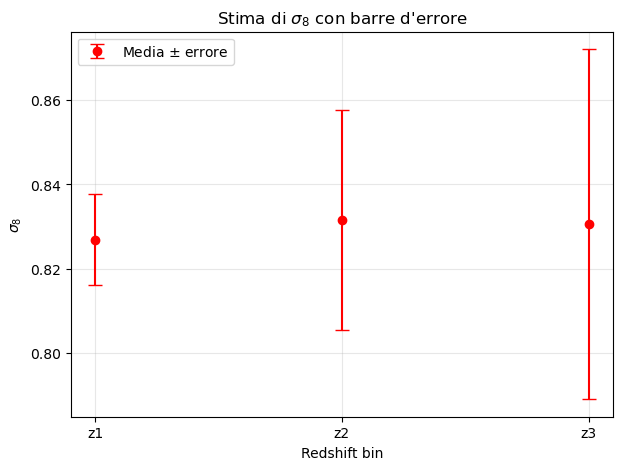

In [44]:
# Estraggo valori
z = df.index
media_k = df["Media"].values
var_k=df["Varianza"].values
errore_k=np.sqrt(var_k)
# Grafico con barre d'errore
plt.figure(figsize=(7,5))
plt.errorbar(z, media_k, yerr=3*errore_k, fmt='o', capsize=5, color="red", label=r"Media $\pm$ errore")

plt.xlabel("Redshift bin")
plt.ylabel(r"$\sigma_8$")
plt.title(r"Stima di $\sigma_8$ con barre d'errore")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [45]:
dati_Om0_k = {
    "Best Fit": [Om0_bf1_k, Om0_bf2_k , Om0_bf3_k],
    "Media":    [media1_k[1], media2_k[1], media3_k[1]],
    "Varianza": [var1_k[1], var2_k[1], var3_k[1]]
}

# Creazione tabella con indici z1, z2, z3
df = pd.DataFrame(dati_Om0_k, index=["z1", "z2", "z3"])

print("Risultati ottenuti per Om0 con curvatura:", df)

Risultati ottenuti per Om0 con curvatura:     Best Fit     Media  Varianza
z1  0.354785  0.313137  0.000003
z2  0.414003  0.310178  0.000005
z3  0.498381  0.325720  0.000017


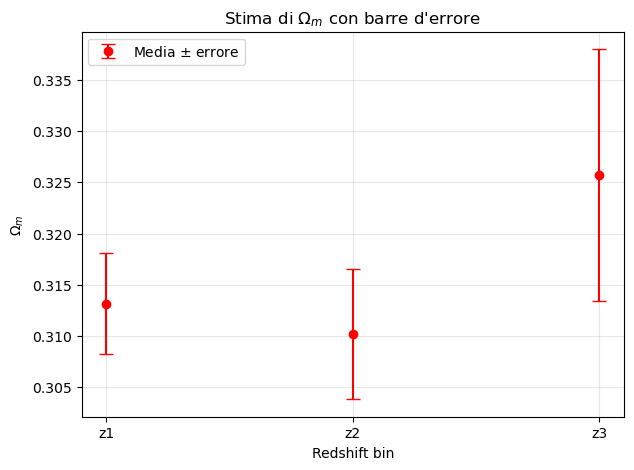

In [46]:
# Estraggo valori
z = df.index
media_k = df["Media"].values
var_k=df["Varianza"].values
errore_k=np.sqrt(var_k)
# Grafico con barre d'errore
plt.figure(figsize=(7,5))
plt.errorbar(z, media_k, yerr=3*errore_k, fmt='o', capsize=5, color="red", label=r"Media $\pm$ errore")

plt.xlabel("Redshift bin")
plt.ylabel(r"$\Omega_m$")
plt.title(r"Stima di $\Omega_m$ con barre d'errore")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [49]:
dati_Ode0_k = {
    "Best Fit": [Ode0_bf1_k, Ode0_bf2_k , Ode0_bf3_k],
    "Media":    [media1_k[2], media2_k[2], media3_k[2]],
    "Varianza": [var1_k[2], var2_k[2], var3_k[2]]
}

# Creazione tabella con indici z1, z2, z3
df = pd.DataFrame(dati_Ode0_k, index=["z1", "z2", "z3"])

print("Risultati ottenuti per Ode0 con curvatura:", df)

Risultati ottenuti per Ode0 con curvatura:     Best Fit     Media  Varianza
z1  0.704533  0.699322  0.002563
z2  0.704533  0.700704  0.002559
z3  0.704532  0.701066  0.002755


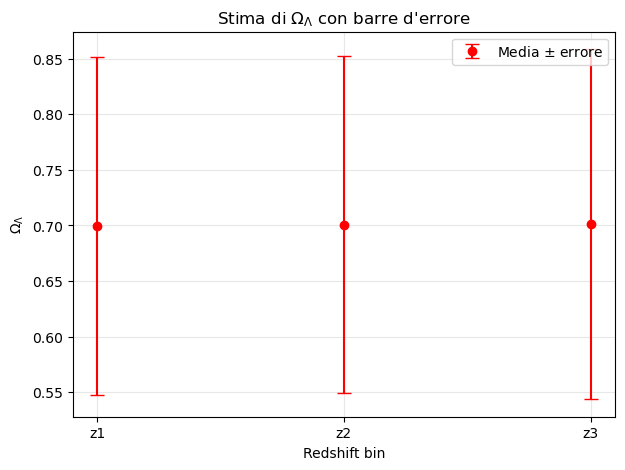

In [50]:
# Estraggo valori
z = df.index
media_k = df["Media"].values
var_k=df["Varianza"].values
errore_k=np.sqrt(var_k)
# Grafico con barre d'errore
plt.figure(figsize=(7,5))
plt.errorbar(z, media_k, yerr=3*errore_k, fmt='o', capsize=5, color="red", label=r"Media $\pm$ errore")

plt.xlabel("Redshift bin")
plt.ylabel(r"$\Omega_\Lambda$")
plt.title(r"Stima di $\Omega_\Lambda$ con barre d'errore")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 4.4 VINCOLI su $\Omega_k$

In un modello cosmologico non piatto, la densità di energia associata alla curvatura abbiamo visto essere: $\Omega_k=1-\Omega_m-\Omega_\Lambda$.<br>
Avendo già ottenuto le distribuzioni a posteriori marginali di $\Omega_m$ e $\Omega_\Lambda$, la distribuzione di $\Omega_k$ si può ottenere direttamente da queste.<br>
Trattando sempre semparatamente i 3 bin di redshift, posso **campionare i valori di $\Omega_k$** in questo modo: $$\Omega_k^i=1-\Omega_m^i-\Omega_\Lambda^i$$ dove i identifica la stima i-esima di ogni parametro ottenuta dalle catene.

In [51]:
import scipy.stats as stats

Omega_k assume per z1 media e varianza pari a -0.012458983164839345 0.002564671532748906
Omega_k compatibile a ~1 sigma con l'universo piatto


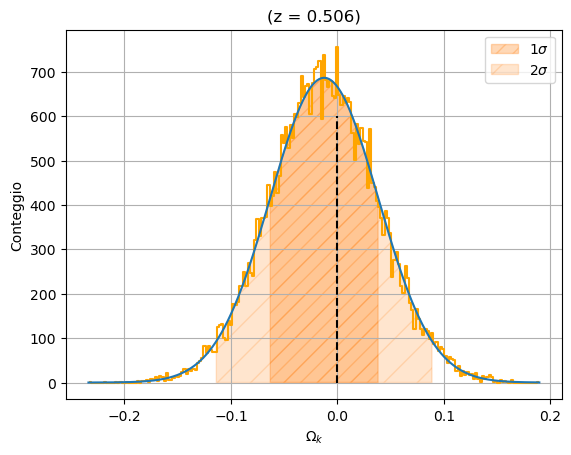

In [52]:
#Ottengo i campioni di Omega_k
Ok_1 = 1-flat_samples1_k[:, 1]-flat_samples1_k[:, 2]

#Costruisco l'istogramma dei conteggi
nbins_Ok_1 = int(np.sqrt(len(Ok_1)))
min_Ok_1 = Ok_1.min()
max_Ok_1 = Ok_1.max()
bins_Ok_1 = np.linspace( min_Ok_1, max_Ok_1, nbins_Ok_1+1 )
conteggi_Ok_1, bins_Ok_1 = np.histogram( Ok_1, bins = bins_Ok_1 )
centri_bins_Ok_1 = 0.5 * ( bins_Ok_1[:-1] + bins_Ok_1[1:] )

#Printo valore medio e varianza
media1_Ok=np.mean(Ok_1)
var1_Ok=np.var(Ok_1)
std1_Ok=np.sqrt(var1_Ok)
print("Omega_k assume per z1 media e varianza pari a", media1_Ok, var1_Ok)


# Fit gaussiana
x1 = np.linspace(min_Ok_1, max_Ok_1, 2000)
bin_larghezza_1 = bins_Ok_1[1] - bins_Ok_1[0]
pdf_gaussian = stats.norm.pdf(x1, loc=media1_Ok, scale=std1_Ok) * len(Ok_1) * bin_larghezza_1
#Grafico l'istogramma
plt.figure()
plt.step( centri_bins_Ok_1, conteggi_Ok_1, where="mid", color="orange" )
plt.plot(x1,pdf_gaussian)
#Bande di confidenza
plt.fill_between(x1,pdf_gaussian,where=(x1>media1_Ok-std1_Ok)*(x1<media1_Ok+std1_Ok),color='C1',
                 hatch='//',alpha=0.3,label=r'$1 \sigma$')
plt.fill_between(x1,pdf_gaussian,where=(x1>media1_Ok-2.*std1_Ok)*(x1<media1_Ok+2.*std1_Ok),color='C1',
                 hatch='/',alpha=0.2,label=r'$2 \sigma$')
plt.vlines(0,0,600, colors="black", linestyles="dashed")
plt.xlabel( r"$\Omega_k$" )
plt.ylabel( "Conteggio" )
plt.title( f"(z = {z1})" )
plt.grid( True, which="both", ls = "-" )
plt.legend()

if np.abs(media1_Ok-0.)<=1.*std1_Ok:
    print("Omega_k compatibile a ~1 sigma con l'universo piatto")

Omega_k assume per z2 media e varianza pari a -0.010881144431089822 0.0025654097673935452
Omega_k compatibile a ~1 sigma con l'universo piatto


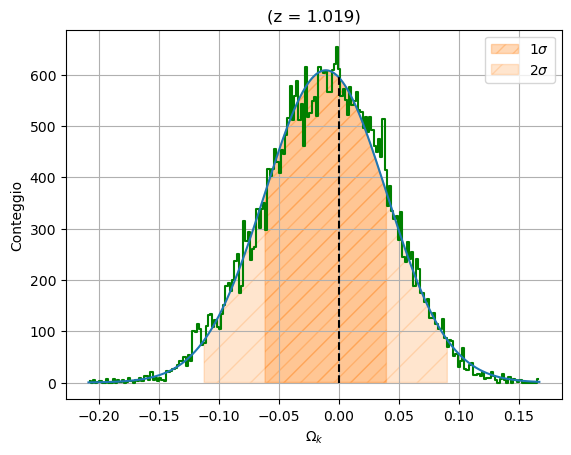

In [53]:
#Ottengo i campioni di Omega_k
Ok_2 = 1-flat_samples2_k[:, 1]-flat_samples2_k[:, 2]

#Costruisco l'istogramma dei conteggi
nbins_Ok_2 = int(np.sqrt(len(Ok_2)))
min_Ok_2 = Ok_2.min()
max_Ok_2 = Ok_2.max()
bins_Ok_2 = np.linspace( min_Ok_2, max_Ok_2, nbins_Ok_2+1 )
conteggi_Ok_2, bins_Ok_2 = np.histogram( Ok_2, bins = bins_Ok_2 )
centri_bins_Ok_2 = 0.5 * ( bins_Ok_2[:-1] + bins_Ok_2[1:] )

#Printo valore medio e varianza
media2_Ok=np.mean(Ok_2)
var2_Ok=np.var(Ok_2)
std2_Ok=np.sqrt(var2_Ok)
print("Omega_k assume per z2 media e varianza pari a", media2_Ok, var2_Ok)

# Fit gaussiana
x2 = np.linspace(min_Ok_2, max_Ok_2, 2000)
bin_larghezza_2 = bins_Ok_2[1] - bins_Ok_2[0]
pdf_gaussian = stats.norm.pdf(x2, loc=media2_Ok, scale=std2_Ok) * len(Ok_2) * bin_larghezza_2
#Grafico l'istogramma
plt.figure()
plt.step( centri_bins_Ok_2, conteggi_Ok_2, where="mid", color="green" )
plt.plot(x2,pdf_gaussian)
#Bande di confidenza
plt.fill_between(x2,pdf_gaussian,where=(x2>media2_Ok-std2_Ok)*(x2<media2_Ok+std2_Ok),color='C1',
                 hatch='//',alpha=0.3,label=r'$1 \sigma$')
plt.fill_between(x2,pdf_gaussian,where=(x2>media2_Ok-2.*std2_Ok)*(x2<media2_Ok+2.*std2_Ok),color='C1',
                 hatch='/',alpha=0.2,label=r'$2 \sigma$')
plt.vlines(0,0,600, colors="black", linestyles="dashed")
plt.xlabel( r"$\Omega_k$" )
plt.ylabel( "Conteggio" )
plt.title( f"(z = {z2})" )
plt.grid( True, which="both", ls = "-" )
plt.legend()

if np.abs(media2_Ok-0.)<=1.*std2_Ok:
    print("Omega_k compatibile a ~1 sigma con l'universo piatto")

Omega_k assume per z3 media e varianza pari a -0.026785658503863143 0.0027660771236819224
Omega_k compatibile a ~1 sigma con l'universo piatto


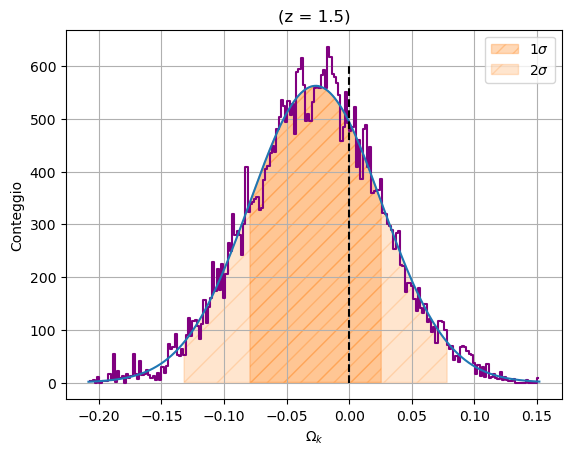

In [54]:
#Ottengo i campioni di Omega_k
Ok_3 = 1-flat_samples3_k[:, 1]-flat_samples3_k[:, 2]

#Costruisco l'istogramma dei conteggi
nbins_Ok_3 = int(np.sqrt(len(Ok_3)))
min_Ok_3 = Ok_3.min()
max_Ok_3 = Ok_3.max()
bins_Ok_3 = np.linspace( min_Ok_3, max_Ok_3, nbins_Ok_3+1 )
conteggi_Ok_3, bins_Ok_3 = np.histogram( Ok_3, bins = bins_Ok_3 )
centri_bins_Ok_3 = 0.5 * ( bins_Ok_3[:-1] + bins_Ok_3[1:] )

#Printo valore medio e varianza
media3_Ok=np.mean(Ok_3)
var3_Ok=np.var(Ok_3)
std3_Ok=np.sqrt(var3_Ok)
print("Omega_k assume per z3 media e varianza pari a", media3_Ok, var3_Ok)

# Fit gaussiana
x3 = np.linspace(min_Ok_3, max_Ok_3, 2000)
bin_larghezza_3 = bins_Ok_3[1] - bins_Ok_3[0]
pdf_gaussian = stats.norm.pdf(x3, loc=media3_Ok, scale=std3_Ok) * len(Ok_3) * bin_larghezza_3
#Grafico l'istogramma
plt.figure()
plt.step( centri_bins_Ok_3, conteggi_Ok_3, where="mid", color="purple" )
plt.plot(x3,pdf_gaussian)
#Bande di confidenza
plt.fill_between(x3,pdf_gaussian,where=(x3>media3_Ok-std3_Ok)*(x3<media3_Ok+std3_Ok),color='C1',
                 hatch='//',alpha=0.3,label=r'$1 \sigma$')
plt.fill_between(x3,pdf_gaussian,where=(x3>media3_Ok-2.*std3_Ok)*(x3<media3_Ok+2.*std3_Ok),color='C1',
                 hatch='/',alpha=0.2,label=r'$2 \sigma$')
plt.vlines(0,0,600, colors="black", linestyles="dashed")
plt.xlabel( r"$\Omega_k$" )
plt.ylabel( "Conteggio" )
plt.title( f"(z = {z3})" )
plt.grid( True, which="both", ls = "-" )
plt.legend()

if np.abs(media3_Ok-0.)<=1.*std3_Ok:
    print("Omega_k compatibile a ~1 sigma con l'universo piatto")

Anche in questo caso grafichiamo le medie con relativo errore ottenute nei tre bin di redshift, e osserviamone la compatibilità:

In [55]:
dati_Ok = {
    "Media":    [media1_Ok, media2_Ok, media3_Ok],
    "Varianza": [var1_Ok, var2_Ok, var3_Ok]
}

# Creazione tabella con indici z1, z2, z3
df_Ok = pd.DataFrame(dati_Ok, index=["z1", "z2", "z3"])

print("Risultati ottenuti per Om0 con curvatura:", df_Ok)

Risultati ottenuti per Om0 con curvatura:        Media  Varianza
z1 -0.012459  0.002565
z2 -0.010881  0.002565
z3 -0.026786  0.002766


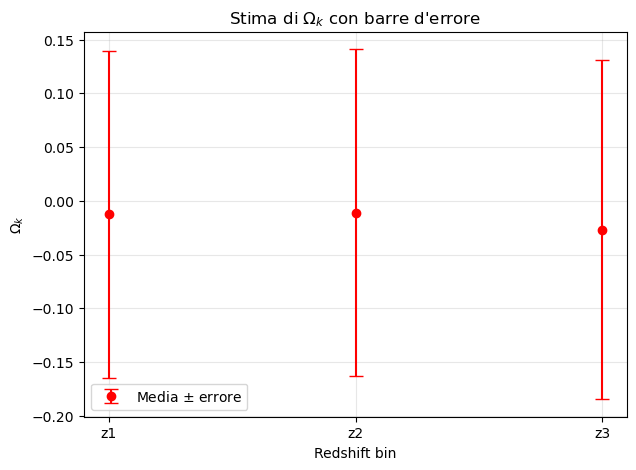

In [56]:
# Estraggo valori
z = df_Ok.index
media_Ok = df_Ok["Media"].values
var_Ok=df_Ok["Varianza"].values
errore_Ok=np.sqrt(var_Ok)
# Grafico con barre d'errore
plt.figure(figsize=(7,5))
plt.errorbar(z, media_Ok, yerr=3*errore_Ok, fmt='o', capsize=5, color="red", label=r"Media $\pm$ errore")

plt.xlabel("Redshift bin")
plt.ylabel(r"$\Omega_k$")
plt.title(r"Stima di $\Omega_k$ con barre d'errore")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## CONCLUSIONI

Abbiamo suddiviso i dati presenti nel catalogo di riferimento in tre intervalli di redshift e costruito, per ciascun intervallo, le distribuzioni dei conteggi degli ammassi in funzione della massa. Utilizzando la libreria Colossus abbiamo quindi adattato la Halo Mass Function (HMF) osservata ai modelli teorici, considerando sia un universo piatto sia un universo con curvatura. In entrambi i casi otteniamo valori di $\chi^2_{ridotto} > 1$, sebbene non eccessivamente elevati.<br>
Successivamente abbiamo analizzato le distribuzioni dei parametri cosmologici, prima assumendo un modello di universo piatto e poi includendo anche la curvatura. I valori medi ottenuti per ciascun parametro nei tre bin di redshift risultano compatibili tra loro e, in una prima analisi, sembrano migliorare il fit della HMF. <br>
Per quanto riguarda la curvatura dell’universo, dalla distribuzione del parametro $\Omega_k$ otteniamo un valore compatibile con zero entro una deviazione standard: possiamo quindi confermare un universo piatto.

<span style="color:red"> NOTA 1: Nel caso in cui fosse necessario vedere i valori dei campioni dei parametri, si è deciso di salvare i dati in un file. </span>

<span style="color:red"> NOTA 2: Nel print dei valori medi e varianze dei parametri della catena relativa a z3 (per un universo con curvatura, sezione 4.1) ho scritto "(z1)" per errore (copiando e incollando il codice mi è sfuggito alle prime letture di controllo), non ho lanciato nuovamente le catene perchè ci metterebbero troppo. Si nota però che è presente questo errore. I valori e l'analisi però sono corretti, relativi al bin di redshift z3, è solamente un errore di scrittura che ho corretto nel codice ma non nel print.</span>